## AI-Driven Optimal Placement of Electric Vehicles Charging Stations in Kenya

![Image URL](https://i.dailymail.co.uk/1s/2022/02/16/15/54273773-0-image-a-33_1645025868934.jpg)


### 1. Business Understanding 

#### 1.1. Backgound Information & Overview

Kenya is undergoing a transportation and energy transformation, with electric vehicle (EV) adoption increasing due to rising fuel costs, government incentives, and a global push for sustainability efforts. However, the absence of a data-driven approach to charging station placement is slowing down EV adoption. Currently, charging station deployment is largely arbitrary, reactive, or limited to a few locations, leading to underutilization, range anxiety, and inefficient infrastructure investment.

##### Problem Statement

The adoption of electric vehicles (EVs) in Kenya is increasing, but the absence of a well-planned, optimized EV charging infrastructure remains a major barrier to widespread adoption. Current charging stations are placed without data-driven insights, leading to low utilization rates, inconvenient locations, and poor return on investment for operators.


##### Proposed Solution

By integrating machine learning, geospatial analytics, and optimization models, this AI-driven platform will revolutionize EV infrastructure planning in Kenya. The solution ensures that charging stations are placed where they are most needed, cost-effective, and energy-efficient, paving the way for a sustainable and profitable EV ecosystem.

* Using K-Means Clustering, DBSCAN, and Hierarchical Clustering to help map out the best possible station locations based on geography and infrastructure constraints.
* Use Graph-based Routing and Dijkstra’s Algorithm to ensure stations are placed within an optimal travel distance for EV users. For example ensuring no driver needs to travel more than 5 km to find a charging station.
* Use Random Forest Regression, XGBoost, and Gradient Boosting Machines (GBM) to identify the key drivers of charging station demand based on traffic volume, population density, nearby commercial hubs, weather conditions and charging station accessibility.

#####  Objectives

###### Primary Objective:

To develop an AI-powered platform that uses machine learning, geospatial data, and predictive analytics to identify optimal locations for electric vehicle (EV) charging stations.

###### Secondary Objectives:

1. To integrate machine learning algorithms for analyzing EV usage patterns and infrastructure needs.
2. To incorporate geospatial data for determining the most efficient and accessible sites for charging stations.
3. To ensure the platform is scalable and adaptable to various regions or cities.
4. To improve the overall efficiency of EV charging infrastructure deployment and usage.

The platform will enable:

* EV charging network planners to maximize utilization and profitability by selecting high-demand locations.
* Government agencies to accelerate green mobility initiatives through data-backed decision-making.
* Investors to make informed funding decisions, ensuring high ROI.
* EV users to access conveniently located charging stations, improving the overall user experience.

##### Metrics of Success

1. The model should correctly predict at least 90% of high-demand locations, minimizing false positives and negatives when identifying optimal sites. 
2. The model should achieve an R² score of at least 0.85, ensuring strong correlation between predicted and actual charging demand.
3. At least 80% of the suggested locations should be within 500 meters of a power grid connection, ensuring practical deployment feasibility.
4. The model should maintain an accuracy above 85% when tested on new urban areas, ensuring adaptability as Nairobi’s EV market grows.





### 2. Data Understanding

The data is sourced from the U.S. Department of Transportation, Bureau of Transportation Statistics, about Electric Vehicle Public Charging Stations in the United States as of January 2020. Link - https://data-usdot.opendata.arcgis.com/datasets/alternative-fueling-stations/explore

### Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import Functions as Mf
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd 
from sklearn.impute import SimpleImputer
from  sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import re
from datetime import datetime, timedelta
from imblearn.over_sampling import SMOTE
from typing import List, Tuple, Optional
import ast
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Alternative_Fueling_Stations.csv

df = pd.read_csv('Alternative_Fueling_Stations.csv')

# Display the first few rows to understand the structure
df.head()


,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,x,y
0,1,private,NaN,NaN,NaN,10/11/2024 12:00:00 AM,NaN,CNG,Private,17.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-86.267021,32.367916
1,2,private,NaN,GOVERNMENT,NaN,2/12/2024 12:00:00 AM,NaN,CNG,Private - Government only,45.0,...,NaN,Privé - Réservé au gouvernement,NaN,NaN,NaN,NaN,NaN,NaN,-84.367461,33.821911
2,3,private,NaN,NaN,NaN,12/13/2023 12:00:00 AM,NaN,CNG,Private,64.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-84.543822,33.760256
3,4,public,24 hours daily,CREDIT_CARD_ALWAYS,CREDIT M V Voyager,4/14/2024 12:00:00 AM,NaN,CNG,Public - Credit card at all times,73.0,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-94.375338,35.362213
4,5,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,12/10/2024 12:00:00 AM,NaN,CNG,Public - Credit card at all times,81.0,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-71.026549,42.374706


In [3]:
df.shape

(97882, 80)

The dataset contains information about alternative fueling stations, including EV charging stations. Key columns relevant for EV Charging Station Placement Analysis include:

* access_code – Whether the station is public or private.
* access_days_time – Availability (e.g., 24-hour access).
* fuel_type_code – Identifies the fuel type (e.g., EV for Electric Vehicles).
* groups_with_access_code – Specifies access permissions.
* ev_pricing_fr – Pricing model for EV charging.
* ev_network_ids_station – Identifies the charging network.
* x, y – Longitude and Latitude coordinates of the station (for mapping).
* federal_agency_name – Indicates government or private ownership.

In [4]:
df['fuel_type_code'].value_counts()

fuel_type_code
ELEC    85398
E85      4719
LPG      2865
BD       1793
RD       1519
CNG      1372
LNG       112
HY        103
Name: count, dtype: int64

* From the above value_counts of the fuel_type_code, we are interested in the electrical vehicles. We proceed to filtering the dataframe for the 'ELEC' fuel_type_code.
* Some of the features are irrelevant to our analysis; First, determine the features of interest in the analysis and filter the dataframe accordingly.

* For exactness of the analysis, filter the data frame to only include ELEC and the filter for state with the highest number of Ev value counts from the ELEC filtered dataframe. For this state, filter for the city with the highest number of Ev charging stations.


In [5]:
df_elec = df[(df['fuel_type_code'] == 'ELEC')] 
df_elec.shape

(85398, 80)

In [6]:
df_elec['state'].value_counts().head(10)

state
CA    19898
MD     5661
NY     5360
TX     4323
FL     4268
MA     3960
WA     2898
CO     2665
GA     2445
PA     2173
Name: count, dtype: int64

In [7]:
df_elec['city'].value_counts().head(10)

city
Frederick        3730
Los Angeles      1941
San Diego         880
Atlanta           814
Austin            745
Seattle           744
Irvine            702
San Jose          667
Boston            643
San Francisco     618
Name: count, dtype: int64

* From the value_counts above, there is a discrepancy between the state and city with the highest number of EV charging stations. While California has the highest number of charging stations, its individual cities have fewer stations compared to Frederick, which is not located in California.

* We filter for the city with the highest number of EV charging stations within California— in this case, "Los Angeles" and cleaned the data accordingly.
* Addressed duplicate entries to resolve this issue, then proceed to filter for both California and Los Angeles.

In [8]:
# Checking for duplicates 
print(f"We have {df_elec.duplicated().sum()} in our data set")

We have 3684 in our data set


In [9]:
# Handling the duplicates 
Ev_df_noduplicate = df_elec.drop_duplicates()
# Confirming that the duplicates have been handled
print(f"Our dataframe now has {Ev_df_noduplicate.duplicated().sum()} duplicates")

Our dataframe now has 0 duplicates


In [10]:
Ev_df_noduplicate['state'].value_counts().head(10)

state
CA    19898
NY     5360
TX     4323
FL     4268
MA     3960
WA     2898
CO     2665
GA     2445
PA     2173
VA     2037
Name: count, dtype: int64

In [11]:
Ev_df_noduplicate['city'].value_counts().head(10)

city
Los Angeles      1941
San Diego         880
Atlanta           814
Austin            745
Seattle           744
Irvine            702
San Jose          667
Boston            643
San Francisco     618
Kansas City       540
Name: count, dtype: int64

In [12]:
df_elec = Ev_df_noduplicate.copy()
df_elec = df_elec[(df_elec['state'] == 'CA') & (df_elec['city'] == 'Los Angeles')]
df_elec.shape

(1941, 80)

* The dataset above has been filtered to include only electric vehicle (EV) charging stations located in California specifically Los Angeles. Although it primarily focuses on EV stations, the dataset contains columns related to other fuel types such as LPG and ethanol. To refine the data, we will remove these irrelevant columns and retain only the ones that pertain to EV charging stations.

* To proceed, we’ll create a list of the relevant columns for filtering and call the check_info function from the My_functions directory to obtain the dataset's information.

In [13]:
# Display the columns
print(df_elec.columns)

Index(['OBJECTID', 'access_code', 'access_days_time', 'access_detail_code',
       'cards_accepted', 'date_last_confirmed', 'expected_date',
       'fuel_type_code', 'groups_with_access_code', 'id',
       'maximum_vehicle_class', 'open_date', 'owner_type_code',
       'restricted_access', 'status_code', 'funding_sources', 'facility_type',
       'station_name', 'station_phone', 'updated_at', 'geocode_status',
       'latitude', 'longitude', 'city', 'country', 'intersection_directions',
       'plus4', 'state', 'street_address', 'zip', 'bd_blends',
       'cng_dispenser_num', 'cng_fill_type_code', 'cng_has_rng', 'cng_psi',
       'cng_renewable_source', 'cng_total_compression', 'cng_total_storage',
       'cng_vehicle_class', 'e85_blender_pump', 'e85_other_ethanol_blends',
       'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num',
       'ev_level2_evse_num', 'ev_network', 'ev_network_web', 'ev_other_evse',
       'ev_pricing', 'ev_renewable_source', 'ev_workplace_charging',


In [14]:
relevant_columns = [
    'station_name', 'latitude', 'longitude', 'city', 'state',"restricted_access","ev_renewable_source",
    'status_code', 'access_code',"cards_accepted","ev_workplace_charging",
    'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num', "intersection_directions","owner_type_code",
    'ev_level2_evse_num', 'ev_network', 'ev_pricing',"access_days_time","maximum_vehicle_class","facility_type"
]

Ev_df = df_elec[relevant_columns]
Ev_df

,station_name,latitude,longitude,city,state,restricted_access,ev_renewable_source,status_code,access_code,cards_accepted,...,ev_dc_fast_num,ev_level1_evse_num,intersection_directions,owner_type_code,ev_level2_evse_num,ev_network,ev_pricing,access_days_time,maximum_vehicle_class,facility_type
126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,0.0,NaN,E,public,NaN,...,NaN,NaN,West hall and South hall,P,7.0,Non-Networked,Free; parking fee,5:30am-9pm; pay lot,LD,PARKING_GARAGE
127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,NaN,NaN,E,private,NaN,...,12.0,NaN,Across Hope,LG,338.0,Non-Networked,NaN,For fleet and employee use only,LD,UTILITY
131,LADWP - EV Service Center,34.066801,-118.227605,Los Angeles,CA,NaN,NaN,E,private,NaN,...,1.0,NaN,NaN,LG,46.0,Non-Networked,NaN,Fleet and employee use only,NaN,UTILITY
132,LADWP - Fairfax Center,34.036777,-118.368841,Los Angeles,CA,NaN,NaN,E,private,NaN,...,NaN,NaN,NaN,LG,13.0,Non-Networked,Free,Fleet use only,NaN,UTILITY
133,LADWP - Palmetto Center,34.039736,-118.236065,Los Angeles,CA,NaN,NaN,E,private,NaN,...,NaN,NaN,NaN,LG,27.0,Non-Networked,NaN,Fleet use only,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97433,Beatrice St LA,33.981682,-118.414946,Los Angeles,CA,NaN,NaN,E,public,NaN,...,NaN,NaN,NaN,NaN,20.0,EVGATEWAY,NaN,24 hours daily,NaN,NaN
97530,5441 E Valley Blvd,34.074090,-118.164775,Los Angeles,CA,NaN,NaN,E,public,NaN,...,NaN,NaN,NaN,NaN,1.0,FLO,NaN,24 hours daily,NaN,NaN
97545,CONSTELLATION PHASE 2- P2 6,34.056472,-118.417441,Los Angeles,CA,NaN,NaN,E,public,NaN,...,NaN,NaN,Level P2- East Center Wall,NaN,2.0,ChargePoint Network,NaN,24 hours daily,NaN,NaN
97670,Division 10,34.057401,-118.216279,Los Angeles,CA,NaN,NaN,E,public,NaN,...,NaN,NaN,NaN,NaN,2.0,EVGATEWAY,NaN,24 hours daily,NaN,NaN


In [15]:
Mf.check_info(Ev_df)

=============== Dataset Shape =================
(1941, 22)

=============== Dataset Columns =================
Index(['station_name', 'latitude', 'longitude', 'city', 'state',
       'restricted_access', 'ev_renewable_source', 'status_code',
       'access_code', 'cards_accepted', 'ev_workplace_charging',
       'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num',
       'intersection_directions', 'owner_type_code', 'ev_level2_evse_num',
       'ev_network', 'ev_pricing', 'access_days_time', 'maximum_vehicle_class',
       'facility_type'],
      dtype='object')

=============== Data Types =================
station_name                object
latitude                   float64
longitude                  float64
city                        object
state                       object
restricted_access           object
ev_renewable_source         object
status_code                 object
access_code                 object
cards_accepted              object
ev_workplace_charging      

* The dataset contains 1,941 records and 23 columns, providing information about electric vehicle (EV) charging stations. The columns include details such as station name, location (latitude, longitude, city, state), station status, access information, EV-specific features (e.g., connector types, charging levels), and various operational attributes (e.g., pricing, workplace charging). 
* The dataset includes missing values in several columns, with notable gaps in data related to renewable sources, pricing, and specific charging capabilities. It primarily contains object and float64 data types. There are no duplicated rows.

### 3. Data Preparation
* The previous section filtered the dataset to ensure we are working with a more specific subset, focusing solely on electric vehicle (EV) charging stations in California, Los Angeles. This refinement allows for a more targeted analysis and removes irrelevant data that could skew the results.

* In this section, the focus shifts to the crucial task of data preparation. This involves cleaning and transforming the dataset to make it suitable for exploratory data analysis (EDA) and modeling. Cleaning the data ensures that missing values, duplicates, and irrelevant columns are addressed, which is essential for maintaining the integrity of our analysis. Additionally, transformations will be applied to standardize data formats, handle outliers, and engineering new features that can improve the performance of machine learning models. 

####  3.1  Data Cleaning
1. Deal with the missing values and filtering for important columns.
2. Deal with Duplicates
3. Further cleaning and transformation; creating new columns, encoding features etc.

#####  3.1.2  Dealing with Missing Values
* To identify the presence of missing entries across the dataset, the .isna() method will be used. This method calculates the percentage of missing values for each column. The results will then be sorted in descending order to highlight the columns with the highest proportion of missing data. The final output will be displayed as a DataFrame, showing each column along with the corresponding percentage of missing entries.

In [16]:
# missing value in percentage
missing_percentage_df = (Ev_df.isna().sum() / len(Ev_df) * 100).sort_values(ascending=False).reset_index()
missing_percentage_df.columns = ['Column Name', 'Missing Percentage']

missing_percentage_df

,Column Name,Missing Percentage
0,ev_renewable_source,99.896960
1,ev_level1_evse_num,99.845440
2,cards_accepted,95.672334
3,ev_dc_fast_num,95.569294
4,restricted_access,91.705307
5,maximum_vehicle_class,91.602267
6,ev_pricing,89.129315
7,facility_type,88.871716
8,owner_type_code,86.862442
9,intersection_directions,71.973210


In [17]:
Ev_df.shape

(1941, 22)

* To maintain data quality while preserving essential information, we established a 10% threshold for missing values. This threshold ensures a balance between dataset integrity and the retention of critical variables required for generating meaningful insights.

* Setting the threshold at 10% minimizes the risk of excluding valuable data while addressing excessive gaps that could compromise analytical accuracy.
Columns with a percentage of missing values exceeding this threshold will be dropped to maintain data reliability.
* The next step is to assess the remaining columns with missing values, specifically access_days_time and ev_level2_evse_num, to determine the appropriate approach for handling these gaps. 

In [18]:
# Dropping columns with above 10% missing values
def drop_high_null_columns(df, threshold=10):
    return df.loc[:, (df.isna().sum() / len(df) * 100) <= threshold]

df_10_percent=drop_high_null_columns(Ev_df, threshold=10).reset_index()
df_10_percent.head(3)
    

,index,station_name,latitude,longitude,city,state,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time
0,126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,E,public,0.0,"[""""J1772""""]",7.0,Non-Networked,5:30am-9pm; pay lot
1,127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,For fleet and employee use only
2,131,LADWP - EV Service Center,34.066801,-118.227605,Los Angeles,CA,E,private,1.0,"[""CHADEMO"",""J1772""]",46.0,Non-Networked,Fleet and employee use only


In [19]:
Ev_df1 = df_10_percent.copy()

In [20]:
# Checking for duplicates 
print(f"We have {Ev_df1.duplicated().sum()} in our data set")

We have 0 in our data set


###### The EV Charging Station Data Dictionary  

#####  **Location Information**  
- **`station_name`**: The name of the EV charging station, typically identifying the location or brand.  
- **`latitude`**: The north-south geographic coordinate of the station (in degrees).  
- **`longitude`**: The east-west geographic coordinate of the station (in degrees).  
- **`city`**: The city where the EV charging station is located.  
- **`state`**: The state or region where the station is located (if applicable).   

##### **Operational Status & Access**  
- **`status_code`**: Indicates the station’s current status (e.g., "Available," "Out of Service," "In Use").  
- **`access_code`**: A code or identifier required to access the charging station (e.g., PIN, card number).  

##### **Charging Equipment & Capabilities**  
- **`ev_connector_types`**: The types of connectors available (e.g., Type 1, Type 2, CCS, CHAdeMO).  
- **`ev_dc_fast_num`**: The number of **DC fast chargers**, which provide rapid charging.  
- **`ev_level1_evse_num`**: The number of **Level 1 EVSE units**, which offer slow charging (typically for residential use).  
- **`ev_level2_evse_num`**: The number of **Level 2 EVSE units**, which offer faster charging and are commonly found in public networks.  

##### **Network**  
- **`ev_network`**: The name of the network operating the station (e.g., Tesla Supercharger, ChargePoint).  


In [21]:
Mf.check_info(Ev_df1)

=============== Dataset Shape =================
(1941, 13)

=============== Dataset Columns =================
Index(['index', 'station_name', 'latitude', 'longitude', 'city', 'state',
       'status_code', 'access_code', 'ev_workplace_charging',
       'ev_connector_types', 'ev_level2_evse_num', 'ev_network',
       'access_days_time'],
      dtype='object')

=============== Data Types =================
index                      int64
station_name              object
latitude                 float64
longitude                float64
city                      object
state                     object
status_code               object
access_code               object
ev_workplace_charging    float64
ev_connector_types        object
ev_level2_evse_num       float64
ev_network                object
access_days_time          object
dtype: object

=============== Dataset Information =================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 1

From the check_info method above, the ev_level2_evse_num and the access_days_time have missing entries.
####  3.1.2.1. Imputing ev_level2_evse_num with zeroes
- In this context, missing values are not due to data collection errors but rather signify that no Level 2 chargers exist at the station. Imputing with a mean or median would artificially inflate infrastructure data, leading to misleading insights. Assigning zero ensures data integrity by accurately reflecting station capabilities without introducing false assumptions.

####  3.1.2.2 Dropping the access_days_time  missing rows

- The access_days_time column represents the duration of the day during which the charging station is operational. Imputing the missing entries with zeros or the median would compromise the accuracy of this critical data, as it would imply the station operates during a full or default duration, which may not reflect the actual operating hours. Therefore, to preserve data integrity and avoid misleading assumptions, it is decided to drop the rows with missing values in this column.

In [22]:
# Handling the missing values
Ev_df1['ev_level2_evse_num'] = Ev_df1['ev_level2_evse_num'].fillna(0)
# Dropping rows with missing entries in the access_day_time column
Ev_df1 = Ev_df1.dropna()
print(f"We have {Ev_df1.isna().sum().sum()} nulls in our dataframe")

We have 0 nulls in our dataframe


* We now can confirm the dataframe has no null entries.

####  3.2  Further Data cleaning and feature Engineering.
* In this section, split the dataset into categorical and numerical columns using the .select_dtypes() method to create separate data frames for each. The primary focus in this step will be on cleaning the categorical columns. This involve addressing any inconsistencies, handling missing values, and ensuring the categorical variables are in a format suitable for further analysis or modeling. 
* The focusing on the categorical data is to ensure that the variables are properly prepared for modelling purpose.

In [23]:
# Viewing the numerical columns
Numericals = Ev_df1.select_dtypes(include='number')
Numericals.head(3)

,index,latitude,longitude,ev_workplace_charging,ev_level2_evse_num
0,126,34.040539,-118.271387,0.0,7.0
1,127,34.059133,-118.248589,1.0,338.0
2,131,34.066801,-118.227605,1.0,46.0


In [24]:
# Viewing the Categorical Columns
categoricals = Ev_df1.select_dtypes(include='object')
categoricals.head(4)

,station_name,city,state,status_code,access_code,ev_connector_types,ev_network,access_days_time
0,Los Angeles Convention Center,Los Angeles,CA,E,public,"[""""J1772""""]",Non-Networked,5:30am-9pm; pay lot
1,LADWP - John Ferraro Building,Los Angeles,CA,E,private,"[""CHADEMO"",""J1772"",""J1772COMBO""]",Non-Networked,For fleet and employee use only
2,LADWP - EV Service Center,Los Angeles,CA,E,private,"[""CHADEMO"",""J1772""]",Non-Networked,Fleet and employee use only
3,LADWP - Fairfax Center,Los Angeles,CA,E,private,"[""""J1772""""]",Non-Networked,Fleet use only


In [25]:
categoricals.columns

Index(['station_name', 'city', 'state', 'status_code', 'access_code',
       'ev_connector_types', 'ev_network', 'access_days_time'],
      dtype='object')

In [26]:
Ev_df2 = Ev_df1.copy()

####  3.2.1 Cleaning Categorical Columns and Preprocessing
##### The station_name column
To start with the station name, create a function, clean_and_split_station_name, that will process the station name column by:
1. strip any leading and trailing spaces.
2. split the string into two parts: the station_region and station_subregion.
- The station_region will comprise of the portion before the hyphen and the station_subregion will contain the sectio after the hyphen.
* For invalid entries that are not strings the function will return NOne fo both parts. If no hyphen is found in a given row entry, both new columns; station_region and station_subregion will be filled with the same string.
The function will then frequency encode these two columns for the modelling purposes. call the function from my functions python file in this projects directory.


In [27]:
# cLeaning and encoding the station_name columns
def clean_and_split_station_name(station_name):
    """
    Cleans the station name by stripping extra spaces and splitting it into two columns:
    - `station_region`: The part before the hyphen
    - `station_subregion`: The part after the hyphen

    Args:
        station_name (str): The station name.

    Returns:
        tuple: (station_region, station_subregion)
    """
    if isinstance(station_name, str):  
        parts = station_name.strip().split(' - ', 1)
        return parts if len(parts) == 2 else (station_name, station_name)
    return None, None  # Handles NaN or non-string values

# Apply the function to split the column efficiently
Ev_df2[['station_region', 'station_subregion']] = (
    Ev_df2['station_name']
    .astype(str)  # Convert everything to string to avoid errors
    .str.strip()
    .str.split(' - ', n=1, expand=True)
    .fillna(method='ffill', axis=1)  # Fill second column with first if there's no hyphen
)
Ev_df2[['station_region', 'station_subregion']]
Ev_df2['station_region_encoded'] = Ev_df2['station_region'].factorize()[0]
Ev_df2['station_subregion_encoded'] = Ev_df2['station_subregion'].factorize()[0]
Ev_df2.head(2)

,index,station_name,latitude,longitude,city,state,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded
0,126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,E,public,0.0,"[""""J1772""""]",7.0,Non-Networked,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,0,0
1,127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,For fleet and employee use only,LADWP,John Ferraro Building,1,1


##### The access_days_time column.
Write a function, calculate hours, that cleans and process the access_daytime column. The function should calculate the the number of hours between the start time and end time extracted from the entries in this column, the function should ensure that the end time is greater than the start time. In this function define another function , extract_time and hours, that extracts time details from parking lot access descriptions. It handles various cases such as "24 hours" descriptions and specific day-based time ranges (e.g., "Mon 9:00am - 5:00pm"). For each recognized time format, the function converts times to a 24-hour format and calculates the number of hours. Then use the process_dataframe function to extract the time and hours from the specified column and adding a new column, access_hours, that stores the calculated hours. The entire process ensures that each parking lot’s access times are standardized, and the total hours are computed for easy analysis.

In [28]:
# Cleaning the access daytime column
def calculate_hours(start_time: str, end_time: str) -> float:
    """
    Calculate the number of hours between start and end time.
    """
    start = datetime.strptime(start_time, "%H:%M")
    end = datetime.strptime(end_time, "%H:%M")
   
    if end < start:
        end = end + timedelta(days=1)
   
    diff = end - start
    hours = diff.total_seconds() / 3600
   
    return round(hours, 2)

def extract_time_and_hours(text: str) -> dict:
    """
    Extract time information and calculate hours from parking lot access descriptions.
    """
    # Handle non-string input
    if pd.isna(text) or not isinstance(text, str):
        return {
            'times': None,
            'hours': None
        }
   
    # Check for 24 hours daily first
    if '24 hours' in text.lower():
        return {
            'times': [('all', '00:00', '23:59')],
            'hours': 24.0
        }
   
    # Pattern for day-specific times
    day_specific_pattern = r'(Mon|Tue|Wed|Thu|Fri|Sat|Sun)\s+(\d{1,2}:?\d{0,2}(?:am|pm))\s*-\s*(\d{1,2}:?\d{0,2}(?:am|pm))'
   
    # Pattern for general time range
    general_time_pattern = r'(\d{1,2}:?\d{0,2}(?:am|pm))-(\d{1,2}:?\d{0,2}(?:am|pm))'
   
    def standardize_time(time_str: str) -> str:
        """Convert time strings to 24-hour format."""
        time_str = time_str.strip().lower()
       
        if ':' not in time_str:
            time_str = time_str.replace('am', ':00am').replace('pm', ':00pm')
       
        hour = int(time_str.split(':')[0])
        minutes = int(time_str.split(':')[1][:2])
        is_pm = 'pm' in time_str
       
        if is_pm and hour != 12:
            hour += 12
        elif not is_pm and hour == 12:
            hour = 0
           
        return f"{hour:02d}:{minutes:02d}"
   
    # Try to find day-specific times first
    day_matches = re.findall(day_specific_pattern, text)
    if day_matches:
        # Take only the first day's times since they're all the same
        day, start, end = day_matches[0]
        start_time = standardize_time(start)
        end_time = standardize_time(end)
        hours = calculate_hours(start_time, end_time)
        return {
            'times': [(day, start_time, end_time)],
            'hours': hours
        }
   
    # If no day-specific times found, look for general time range
    general_matches = re.findall(general_time_pattern, text)
    if general_matches:
        start_time = standardize_time(general_matches[0][0])
        end_time = standardize_time(general_matches[0][1])
        hours = calculate_hours(start_time, end_time)
        return {
            'times': [('all', start_time, end_time)],
            'hours': hours
        }
   
    return {
        'times': None,
        'hours': None
    }

def process_dataframe(df, column_name='access_days_time'):
    """
    Process the dataframe and add hours column.
   
    Args:
        df: pandas DataFrame
        column_name: name of the column containing time information
   
    Returns:
        pandas DataFrame with new 'access_hours' column
    """
 
    # Apply the extraction function to each row
    results = df[column_name].apply(extract_time_and_hours)
   
    # Add the hours as a new column
    df['access_hours'] = results.apply(lambda x: x['hours'])
   
    return df

Ev_df2 = process_dataframe(Ev_df2)
Ev_df2[:5]

,index,station_name,latitude,longitude,city,state,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours
0,126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,E,public,0.0,"[""""J1772""""]",7.0,Non-Networked,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,0,0,15.5
1,127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,For fleet and employee use only,LADWP,John Ferraro Building,1,1,NaN
2,131,LADWP - EV Service Center,34.066801,-118.227605,Los Angeles,CA,E,private,1.0,"[""CHADEMO"",""J1772""]",46.0,Non-Networked,Fleet and employee use only,LADWP,EV Service Center,1,2,NaN
3,132,LADWP - Fairfax Center,34.036777,-118.368841,Los Angeles,CA,E,private,0.0,"[""""J1772""""]",13.0,Non-Networked,Fleet use only,LADWP,Fairfax Center,1,3,NaN
4,133,LADWP - Palmetto Center,34.039736,-118.236065,Los Angeles,CA,E,private,1.0,"[""""J1772""""]",27.0,Non-Networked,Fleet use only,LADWP,Palmetto Center,1,4,NaN


In [29]:
Ev_df2['access_hours'].isna().sum()

np.int64(79)

In [30]:
# some rows have no clear time on what time they operate so we decided to fill those rows with zero
Ev_df2['access_hours'] = Ev_df2['access_hours'].fillna(0)

##### The ev_connector_types column.
* The ev_connector_types column entries are lists of the types of chargers. To deal with this column, we first have to clean the entries. To clean, we remove any unwanted extra quotes (replacing double quotes "" with a single "), and then strips any leading or trailing whitespace from the values in the specified column. Next, we create a function that converts any string representations of lists into an actual Python list using the ast.literal_eval function, but only if the value is a string.
* Apply the function to the DataFrame Ev_df2, ensuring that the ev_connector_types column contains properly formatted Python lists.

* For the cleaned column, perform onehot encoding. Create a function encode_connector_types that:

1 - checks that the entries in the rows are lists

2 - handles missing values or the non-list entries

3 - encodes using the multilabel binarizer from the sklearn.preprocessing

4 - transforms the lists into multiple binary columns where each column represents a specific EV connector type.

* Concatenate the encoded columns with the original DataFrame, and drop the original ev_connector_types column. 
* Apply this function to the Ev_df2 DataFrame, and return the resulting DataFrame.

In [31]:
Ev_df2["ev_connector_types"].value_counts()

ev_connector_types
[""J1772""]                         1765
["CHADEMO","J1772COMBO"]              26
["CHADEMO","J1772","J1772COMBO"]      15
[""CHADEMO""]                         10
[""TESLA""]                            6
[""J1772COMBO""]                       5
["CHADEMO","J1772"]                    4
["J1772","NEMA520"]                    1
["J1772","NEMA515"]                    1
["J1772","J1772COMBO"]                 1
Name: count, dtype: int64

In [32]:
# Cleaning the ev_connector_types  column
# Function to clean and parse the ev_connector_types column
def clean_ev_connector_types(df, column_name="ev_connector_types"):
    # Strip spaces and remove unwanted quotes
    df[column_name] = df[column_name].str.replace(r'""', '"', regex=True).str.strip()
    # Convert string lists to actual Python lists
    df[column_name] = df[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    return df
# Apply function
Ev_df2 = clean_ev_connector_types(Ev_df2)
Ev_df2.tail(3)

,index,station_name,latitude,longitude,city,state,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours
1938,97545,CONSTELLATION PHASE 2- P2 6,34.056472,-118.417441,Los Angeles,CA,E,public,0.0,[J1772],2.0,ChargePoint Network,24 hours daily,CONSTELLATION PHASE 2- P2 6,CONSTELLATION PHASE 2- P2 6,1746,1797,24.0
1939,97670,Division 10,34.057401,-118.216279,Los Angeles,CA,E,public,0.0,[J1772],2.0,EVGATEWAY,24 hours daily,Division 10,Division 10,1747,1798,24.0
1940,97745,182 S Alameda St,34.047485,-118.237956,Los Angeles,CA,E,public,0.0,[J1772],1.0,FLO,24 hours daily,182 S Alameda St,182 S Alameda St,1748,1799,24.0


In [33]:
def encode_connector_types(df, column_name='ev_connector_types'):
    """
    One-hot encode a column containing lists of EV connector types.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing the connector types column
    column_name (str): Name of the column containing lists of connector types
    
    Returns:
    pandas.DataFrame: DataFrame with encoded connector types
    """
    from sklearn.preprocessing import MultiLabelBinarizer
    import pandas as pd
    
    # Create a copy to avoid modifying the original DataFrame
    df_encoded = df.copy()

    # Ensuring the column contains lists (handle missing values and non-list entries)
    df_encoded[column_name] = df_encoded[column_name].apply(
        lambda x: x if isinstance(x, list) else [] if pd.isna(x) else [x]
    )
    
    # Instanciating MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    # Transform the column into multiple binary columns
    encoded_data = mlb.fit_transform(df_encoded[column_name])
    # Get class names and ensure they're valid column names
    classes = [str(cls).replace(' ', '_') for cls in mlb.classes_]
    
    #  Encoding columns
    encoded_df = pd.DataFrame(encoded_data, columns=classes, index=df_encoded.index)
    # Concatenating the encoded columns with the original dataframe
    result_df = pd.concat([df_encoded, encoded_df], axis=1)
    # Dropping the original column
    result_df.drop(columns=[column_name], inplace=True)
    return result_df
Ev_df2 = encode_connector_types(Ev_df2, 'ev_connector_types')
Ev_df2.head()

,index,station_name,latitude,longitude,city,state,status_code,access_code,ev_workplace_charging,ev_level2_evse_num,...,station_subregion,station_region_encoded,station_subregion_encoded,access_hours,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA
0,126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,E,public,0.0,7.0,...,Los Angeles Convention Center,0,0,15.5,0,1,0,0,0,0
1,127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,E,private,1.0,338.0,...,John Ferraro Building,1,1,0.0,1,1,1,0,0,0
2,131,LADWP - EV Service Center,34.066801,-118.227605,Los Angeles,CA,E,private,1.0,46.0,...,EV Service Center,1,2,0.0,1,1,0,0,0,0
3,132,LADWP - Fairfax Center,34.036777,-118.368841,Los Angeles,CA,E,private,0.0,13.0,...,Fairfax Center,1,3,0.0,0,1,0,0,0,0
4,133,LADWP - Palmetto Center,34.039736,-118.236065,Los Angeles,CA,E,private,1.0,27.0,...,Palmetto Center,1,4,0.0,0,1,0,0,0,0


##### The status code column.
* This column contain three different entries; E,T and P. The best way to deal with this column is by onehot encoding.
* Use the pd.get_dummies function from pandas. This function converts the unique values in this column into separate binary columns. Each new column corresponds to one of the unique status_code values, where a 1 indicates the presence of that specific status code and a 0 indicates its absence. 
* It returns a DataFrame where the status_code column is replaced by multiple binary columns, each representing a different possible status code. 

In [34]:
# Chevk the value counts of column status code
Ev_df2['status_code'].value_counts()

status_code
E    1518
T     311
P       5
Name: count, dtype: int64

In [35]:
# Apply one-hot encoding
Ev_df2 = pd.get_dummies(Ev_df2, columns=['status_code'])
# Display the dataframe
Ev_df2 .head(3)

,index,station_name,latitude,longitude,city,state,access_code,ev_workplace_charging,ev_level2_evse_num,ev_network,...,access_hours,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T
0,126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,public,0.0,7.0,Non-Networked,...,15.5,0,1,0,0,0,0,True,False,False
1,127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,private,1.0,338.0,Non-Networked,...,0.0,1,1,1,0,0,0,True,False,False
2,131,LADWP - EV Service Center,34.066801,-118.227605,Los Angeles,CA,private,1.0,46.0,Non-Networked,...,0.0,1,1,0,0,0,0,True,False,False


##### The city and state column.
- Frequency encoding helps optimize EV station placement by turning city names into numbers based on how often they appear in the dataset. This allows machine learning models to identify high-demand areas—like big cities needing more charging stations—without adding unnecessary complexity.
* For these columns, drop rows with missing values.Then standardize the entries in both columns by converting the state values to uppercase and replacing full state names (like "California" and "New York State") with their abbreviations (e.g., "CA" and "NY"). 
* Similarly, convert the city column to lowercase and common abbreviations (e.g., "NYC" and "SF") and replace with full city names (e.g., "New York" and "San Francisco"). After cleaning, apply frequency encoding to both  columns, create two new columns: state_freq_encoded and city_freq_encoded. These columns store the frequency of each unique state and city in the dataset. 

In [36]:
# Cleaning the 'state' and 'city' columns
def clean_and_encode_ev_data(df):
    # Drop missing values in 'state' and 'city' columns early
    df = df.dropna(subset=["state", "city"]).copy()

    # Standardizing states and cities
    df["state"] = df["state"].str.upper().str.strip().replace({
        "CALIFORNIA": "CA",
        "NEW YORK STATE": "NY",
        "FLORIDA": "FL",
    })

    df["city"] = df["city"].str.lower().str.strip().replace({
        "nyc": "new york",
        "sf": "san francisco",
        "san fran": "san francisco",
        "la": "los angeles",
    })

    # Apply frequency encoding
    df["state_freq_encoded"] = df["state"].map(df["state"].value_counts())
    df["city_freq_encoded"] = df["city"].map(df["city"].value_counts())

    return df
Ev_df2 = clean_and_encode_ev_data(Ev_df2)    
Ev_df2.head(3)

,index,station_name,latitude,longitude,city,state,access_code,ev_workplace_charging,ev_level2_evse_num,ev_network,...,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T,state_freq_encoded,city_freq_encoded
0,126,Los Angeles Convention Center,34.040539,-118.271387,los angeles,CA,public,0.0,7.0,Non-Networked,...,1,0,0,0,0,True,False,False,1834,1834
1,127,LADWP - John Ferraro Building,34.059133,-118.248589,los angeles,CA,private,1.0,338.0,Non-Networked,...,1,1,0,0,0,True,False,False,1834,1834
2,131,LADWP - EV Service Center,34.066801,-118.227605,los angeles,CA,private,1.0,46.0,Non-Networked,...,1,0,0,0,0,True,False,False,1834,1834


##### The access_code column.
This column is a binary; i.e comprises of two different entries, private and public. These entries can be converted to numerical by label encoding or by mapping the entries to numeric values.
* Clean the access_code column by performing the following steps: 
1.  convert the values in the access_code column to lowercase and remove any leading or trailing whitespace. 
2.  Map the cleaned values to binary numeric values: "private" is mapped to 0 and "public" is mapped to 1. 
3.  Store the cleaned values  in a new column called access_code_cleaned.

In [37]:
pd.set_option('display.max_columns', None)
# Cleaning the Access code column
Ev_df2["access_code_cleaned"] = Ev_df2["access_code"].astype(str).str.lower().str.strip().map({"private": 0, "public": 1})
Ev_df2.tail(3)

,index,station_name,latitude,longitude,city,state,access_code,ev_workplace_charging,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T,state_freq_encoded,city_freq_encoded,access_code_cleaned
1938,97545,CONSTELLATION PHASE 2- P2 6,34.056472,-118.417441,los angeles,CA,public,0.0,2.0,ChargePoint Network,24 hours daily,CONSTELLATION PHASE 2- P2 6,CONSTELLATION PHASE 2- P2 6,1746,1797,24.0,0,1,0,0,0,0,True,False,False,1834,1834,1
1939,97670,Division 10,34.057401,-118.216279,los angeles,CA,public,0.0,2.0,EVGATEWAY,24 hours daily,Division 10,Division 10,1747,1798,24.0,0,1,0,0,0,0,True,False,False,1834,1834,1
1940,97745,182 S Alameda St,34.047485,-118.237956,los angeles,CA,public,0.0,1.0,FLO,24 hours daily,182 S Alameda St,182 S Alameda St,1748,1799,24.0,0,1,0,0,0,0,True,False,False,1834,1834,1


##### The ev_network column.

* The column ev_network represents the type of chargers or the manufacturer.
- First clean the ev_network column by stripping any leading or trailing spaces. Then apply frequency encoding, where each unique value in the ev_network column is mapped to its corresponding frequency, i.e the number of occurrences of that value in the column). Stored the frequencies in a new column called ev_network_encoded.

In [38]:
Ev_df2["ev_network"].value_counts()

ev_network
ChargePoint Network    975
FLO                    383
SHELL_RECHARGE         181
Non-Networked           92
Blink Network           64
POWERFLEX               34
LOOP                    26
EVGATEWAY               26
eVgo Network            13
AMPUP                   12
EV Connect              11
Tesla                    6
Electrify America        5
EVMATCH                  3
VIALYNK                  2
AUTEL                    1
Name: count, dtype: int64

In [39]:
# Clean the ev_network column (remove extra spaces, unify "Non-Network" with "Non-Networked")
Ev_df2["ev_network"] = Ev_df2["ev_network"].str.strip()

# Perform frequency encoding
freq_encoding = Ev_df2["ev_network"].value_counts().to_dict()
Ev_df2["ev_network_encoded"] = Ev_df2["ev_network"].map(freq_encoding)

pd.set_option('display.max_columns', None)
Ev_df2.head(2)

,index,station_name,latitude,longitude,city,state,access_code,ev_workplace_charging,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T,state_freq_encoded,city_freq_encoded,access_code_cleaned,ev_network_encoded
0,126,Los Angeles Convention Center,34.040539,-118.271387,los angeles,CA,public,0.0,7.0,Non-Networked,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,0,0,15.5,0,1,0,0,0,0,True,False,False,1834,1834,1,92
1,127,LADWP - John Ferraro Building,34.059133,-118.248589,los angeles,CA,private,1.0,338.0,Non-Networked,For fleet and employee use only,LADWP,John Ferraro Building,1,1,0.0,1,1,1,0,0,0,True,False,False,1834,1834,0,92


In [40]:
#  dropping of irrelavant columns
Drop_columns = ['station_name','city', 'state', 'access_code','ev_network', 'access_days_time','station_region', 'station_subregion']
Ev_df3 = Ev_df2.drop(columns=Drop_columns)
Ev_df3

,index,latitude,longitude,ev_workplace_charging,ev_level2_evse_num,station_region_encoded,station_subregion_encoded,access_hours,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T,state_freq_encoded,city_freq_encoded,access_code_cleaned,ev_network_encoded
0,126,34.040539,-118.271387,0.0,7.0,0,0,15.5,0,1,0,0,0,0,True,False,False,1834,1834,1,92
1,127,34.059133,-118.248589,1.0,338.0,1,1,0.0,1,1,1,0,0,0,True,False,False,1834,1834,0,92
2,131,34.066801,-118.227605,1.0,46.0,1,2,0.0,1,1,0,0,0,0,True,False,False,1834,1834,0,92
3,132,34.036777,-118.368841,0.0,13.0,1,3,0.0,0,1,0,0,0,0,True,False,False,1834,1834,0,92
4,133,34.039736,-118.236065,1.0,27.0,1,4,0.0,0,1,0,0,0,0,True,False,False,1834,1834,0,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,97433,33.981682,-118.414946,0.0,20.0,1744,1795,24.0,0,1,0,0,0,0,True,False,False,1834,1834,1,26
1937,97530,34.074090,-118.164775,0.0,1.0,1745,1796,24.0,0,1,0,0,0,0,True,False,False,1834,1834,1,383
1938,97545,34.056472,-118.417441,0.0,2.0,1746,1797,24.0,0,1,0,0,0,0,True,False,False,1834,1834,1,975
1939,97670,34.057401,-118.216279,0.0,2.0,1747,1798,24.0,0,1,0,0,0,0,True,False,False,1834,1834,1,26


##### The street_address column.

* Dropping the street_address column is justified because the latitude and longitude columns already provide precise location data, which is sufficient for clustering. 
* The street address is redundant and does not add value for distance-based clustering. Removing it simplifies the data and improves the efficiency of the clustering process.

### 4 Exploratory Data Analysis(EDA)


#### 4.1 Univariate anlysis
In this section, we examine each variable or features individually with an aim to understand the distribution, spread and central tendency. The focus is on a single column at a time and checking for those deliverables.
For the numerical columns we check for the descriptive statistic: mean, median mode, standard deviation and percentiles.
- The visualizations could include:
1. Histograms to assess the distributions
2. Box plots to detect the outliers
3. Density plots that visualize the probability distributions
The categorical features are to be represented by: frequency counts thatshow how often categories appear.
Bar charts are also used to represent the the frequency distributions for categorical data.
##### 4.1.1 Univariate Anlysis for Numerical Features.

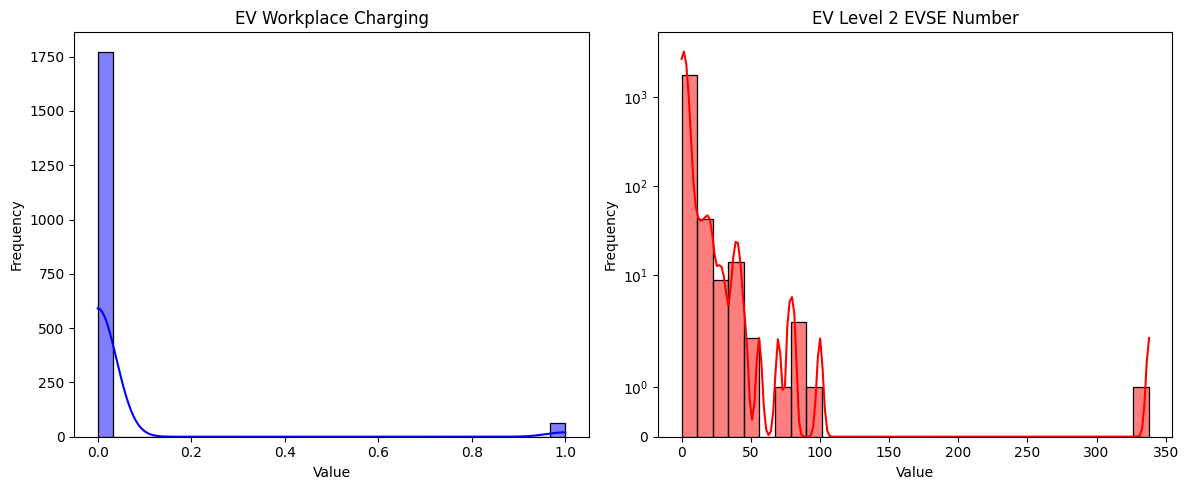

In [41]:
# Checking on the distribution  of the 2 numerical columns 
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

# Plot the first histogram
sns.histplot(Numericals["ev_workplace_charging"], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title("EV Workplace Charging")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")
plt.yscale("symlog")

# Plot the second histogram
sns.histplot(Numericals["ev_level2_evse_num"], bins=30, kde=True, color='red', ax=axes[1])
axes[1].set_title("EV Level 2 EVSE Number")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")
plt.yscale("symlog")

plt.tight_layout()
plt.show()

For the numerical columns, both ev_level2_evse_num and ev_workplace_charging are positively skewed. Their distributions are asymmetrical, with a longer tail on the right-hand side. This suggests that most of the values are clustered towards the lower end of the range, but there are a few higher values that stretch the distribution to the right.
* The majority of stations have only a few Level 2 chargers, but there are some stations with many more, creating the long right tail in the distribution.
* The workplace charging is a numerical but binary. positive skewnes in this feature imply that majority of workplaces in the dataset do not offer charging facilities.
##### 4.1.1 Univariate Analysis for Categorical Features.

##### 1. The access_code column

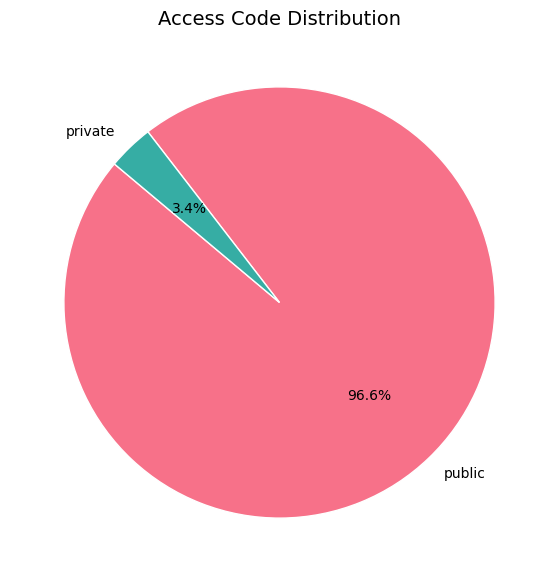

In [42]:
# Distribution of Access code
data = Ev_df2['access_code'].value_counts()
colors = sns.color_palette("husl", len(data))
plt.figure(figsize=(7,7))
plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'})
plt.title("Access Code Distribution", fontsize=14)
plt.show()


In [43]:
Ev_df2['access_code'].value_counts()

access_code
public     1771
private      63
Name: count, dtype: int64

* The distribution of the access_code column reveals an uneven class distribution, with stations classified as private accounting for only 3.4% of the data, while public stations make up 96.6%. This imbalance presents a challenge for predictive modeling, as the majority of stations are classified as public. In the context of clustering, particularly with the K-means algorithm, this imbalance could lead to biased results. 
* Since K-means is sensitive to the distribution of the data and tends to favor the majority class, the model might predominantly classify stations as public, potentially overlooking important patterns related to private stations. Addressing this imbalance is crucial to ensure the clustering model produces meaningful and representative clusters. 
* To address class imbalance in this column, Use SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic samples of the minority Private stations. Create a code that takes in the dataframe, and the column, performs class balancing and returns the balanced dataframe.

In [63]:
# Confirm class balancing in the Ev_df2 
Ev_df3['access_code_cleaned'].value_counts()

access_code_cleaned
1    1771
0    1771
Name: count, dtype: int64

lso the ev_workplace_charging from the numerical section display imbalance between Ev stations classified as 1 and 0. call the above function to eliminate class imbalance


Original distribution:
access_code_cleaned
1    96.6
0     3.4
Name: proportion, dtype: float64

Balanced distribution:
access_code_cleaned
1    50.0
0    50.0
Name: proportion, dtype: float64


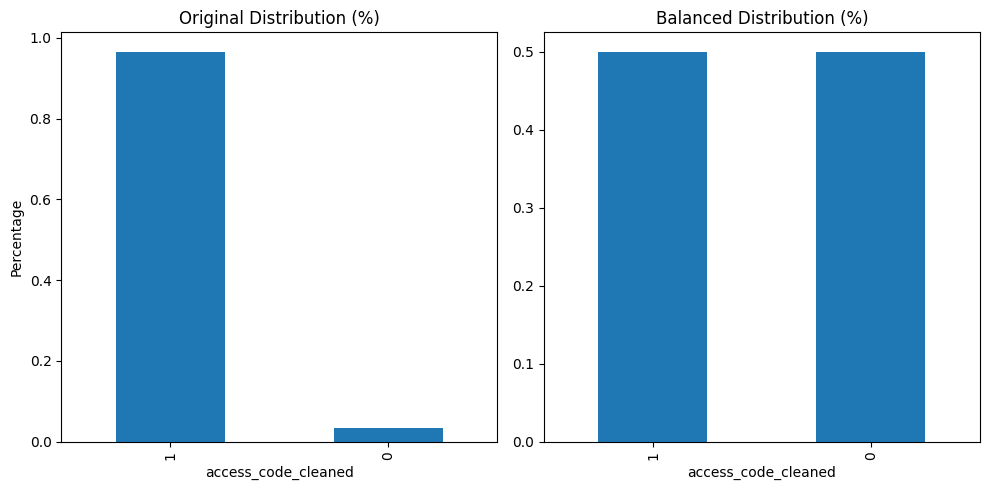

,index,latitude,longitude,ev_workplace_charging,ev_level2_evse_num,station_region_encoded,station_subregion_encoded,access_hours,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T,state_freq_encoded,city_freq_encoded,ev_network_encoded,access_code_cleaned
0,126,34.040539,-118.271387,0.000000,7.000000,0,0,15.500000,0,1,0,0,0,0,True,False,False,1834,1834,92,1
1,127,34.059133,-118.248589,1.000000,338.000000,1,1,0.000000,1,1,1,0,0,0,True,False,False,1834,1834,92,0
2,131,34.066801,-118.227605,1.000000,46.000000,1,2,0.000000,1,1,0,0,0,0,True,False,False,1834,1834,92,0
3,132,34.036777,-118.368841,0.000000,13.000000,1,3,0.000000,0,1,0,0,0,0,True,False,False,1834,1834,92,0
4,133,34.039736,-118.236065,1.000000,27.000000,1,4,0.000000,0,1,0,0,0,0,True,False,False,1834,1834,92,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,49575,34.053174,-118.225166,0.748384,6.238690,913,958,17.961224,0,1,0,0,0,0,True,False,False,1834,1834,48,0
3538,48218,34.050239,-118.241959,1.000000,36.923752,865,909,2.050832,0,1,0,0,0,0,True,False,False,1834,1834,34,0
3539,10035,34.028785,-118.445125,0.565979,11.961853,5,51,0.000000,0,1,0,0,0,0,True,False,False,1834,1834,92,0
3540,60970,34.014263,-118.243435,0.258712,3.517423,1261,1309,0.000000,0,1,0,0,0,0,True,False,False,1834,1834,12,0


In [44]:
# doing the resampling
def balance_column(df, column_to_balance):
    """
    Balance a specific from imblearn.over_sampling import SMOTE in a dataframe using SMOTE.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe
    column_to_balance : str
        Name of the column to balance
    
    Returns:
    --------
    pandas.DataFrame
        Balanced dataframe
    """
    # Get all columns except the one we want to balance
    feature_columns = [col for col in df.columns if col != column_to_balance]
    
    # Separate features (X) and target column (y)
    X = df[feature_columns]
    y = df[column_to_balance]
    
    # Print original distribution
    print("\nOriginal distribution:")
    print(y.value_counts(normalize=True).multiply(100).round(1))
    
    # Apply SMOTE to balance the data
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X, y)
    
    # Create new balanced dataframe
    df_balanced = pd.DataFrame(X_balanced, columns=feature_columns)
    df_balanced[column_to_balance] = y_balanced
    
    # Print new distribution
    print("\nBalanced distribution:")
    print(df_balanced[column_to_balance].value_counts(normalize=True).multiply(100).round(1))
    
    # Plot the distributions
    plt.figure(figsize=(10, 5))
    
    # Original distribution
    plt.subplot(1, 2, 1)
    y.value_counts(normalize=True).plot(kind='bar')
    plt.title('Original Distribution (%)')
    plt.ylabel('Percentage')
    
    # Balanced distribution
    plt.subplot(1, 2, 2)
    df_balanced[column_to_balance].value_counts(normalize=True).plot(kind='bar')
    plt.title('Balanced Distribution (%)')
    
    plt.tight_layout()
    plt.show()
    
    return df_balanced

# Example usage:
"""
# For your EV charging station data:
"""
Ev_df3 = balance_column(Ev_df3, 'access_code_cleaned')
Ev_df3

Apply SMOTE only to the target column, not to predictor columns. SMOTE is designed to balance the distribution of the target variable in classification problems, not to alter the features.
Using SMOTE before splitting the dataset can lead to data leakage, where synthetic samples end up in both training and test sets, resulting in overly optimistic performance metrics.


No, SMOTE should not be used on predictor columns in K-means clustering because SMOTE is designed specifically for supervised learning tasks where there's a target variable. Clustering, including K-means, is an unsupervised learning technique that doesn't involve a target variable. Using SMOTE on predictor columns would generate synthetic data points that may not represent the underlying structure of your dataset, potentially distorting the clusters.

🔍 Why SMOTE is Not Suitable for K-means
Designed for Classification: SMOTE works by creating synthetic samples of the minority class to balance class distribution in classification problems.
No Target Variable in Clustering: K-means groups data based on feature similarity, without reference to a target variable. Applying SMOTE would arbitrarily alter feature distributions, affecting cluster centers and boundaries.
Distortion of Feature Space: SMOTE can create samples that fall between classes or clusters, leading to overlapping or poorly defined clusters.
✅ What You Can Do Instead
If Imbalance Affects Clustering: If your dataset is imbalanced (e.g., with certain patterns or categories underrepresented), consider collecting more data or using dimensionality reduction techniques like PCA to mitigate the impact.
Use Density-Based Clustering: If imbalance is an issue, methods like DBSCAN or HDBSCAN are more robust to varying cluster densities compared to K-means.
Oversampling Predictors (If Absolutely Needed): If you must oversample for clustering, use techniques like random oversampling or adaptive synthetic sampling (ADASYN) carefully, ensuring you do not distort the data distribution.

In [45]:
# Confirm class balancing in the Ev_df2 
Ev_df3['access_code_cleaned'].value_counts()

access_code_cleaned
1    1771
0    1771
Name: count, dtype: int64

Also the ev_workplace_charging from the numerical section display imbalance between Ev stations classified as 1 and 0. call the above function to eliminate class imbalance


Original distribution:
access_code_cleaned
1    50.0
0    50.0
Name: proportion, dtype: float64

Balanced distribution:
access_code_cleaned
1    50.0
0    50.0
Name: proportion, dtype: float64


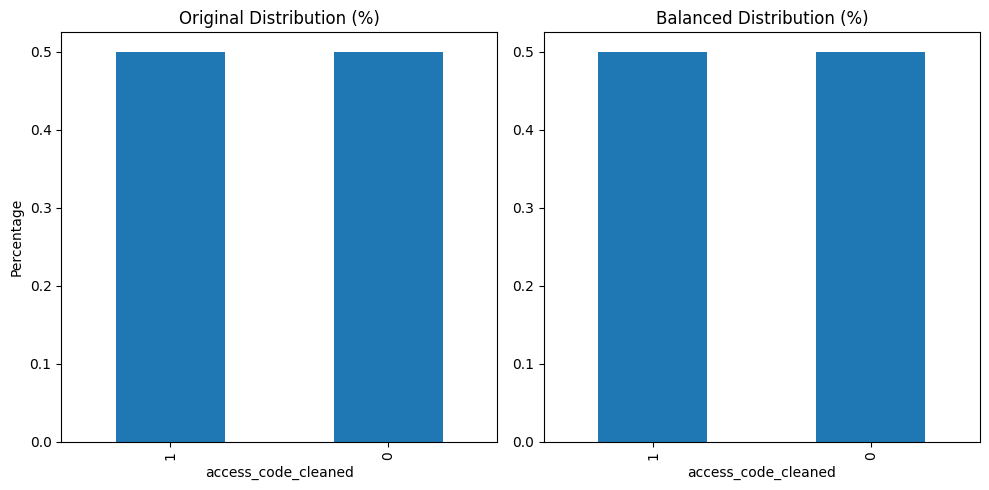

,index,latitude,longitude,ev_workplace_charging,ev_level2_evse_num,station_region_encoded,station_subregion_encoded,access_hours,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T,state_freq_encoded,city_freq_encoded,ev_network_encoded,access_code_cleaned
0,126,34.040539,-118.271387,0.000000,7.000000,0,0,15.500000,0,1,0,0,0,0,True,False,False,1834,1834,92,1
1,127,34.059133,-118.248589,1.000000,338.000000,1,1,0.000000,1,1,1,0,0,0,True,False,False,1834,1834,92,0
2,131,34.066801,-118.227605,1.000000,46.000000,1,2,0.000000,1,1,0,0,0,0,True,False,False,1834,1834,92,0
3,132,34.036777,-118.368841,0.000000,13.000000,1,3,0.000000,0,1,0,0,0,0,True,False,False,1834,1834,92,0
4,133,34.039736,-118.236065,1.000000,27.000000,1,4,0.000000,0,1,0,0,0,0,True,False,False,1834,1834,92,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,49575,34.053174,-118.225166,0.748384,6.238690,913,958,17.961224,0,1,0,0,0,0,True,False,False,1834,1834,48,0
3538,48218,34.050239,-118.241959,1.000000,36.923752,865,909,2.050832,0,1,0,0,0,0,True,False,False,1834,1834,34,0
3539,10035,34.028785,-118.445125,0.565979,11.961853,5,51,0.000000,0,1,0,0,0,0,True,False,False,1834,1834,92,0
3540,60970,34.014263,-118.243435,0.258712,3.517423,1261,1309,0.000000,0,1,0,0,0,0,True,False,False,1834,1834,12,0


In [46]:
Ev_df3 = balance_column(Ev_df3, 'access_code_cleaned')
Ev_df3

##### 1. The ev_network column

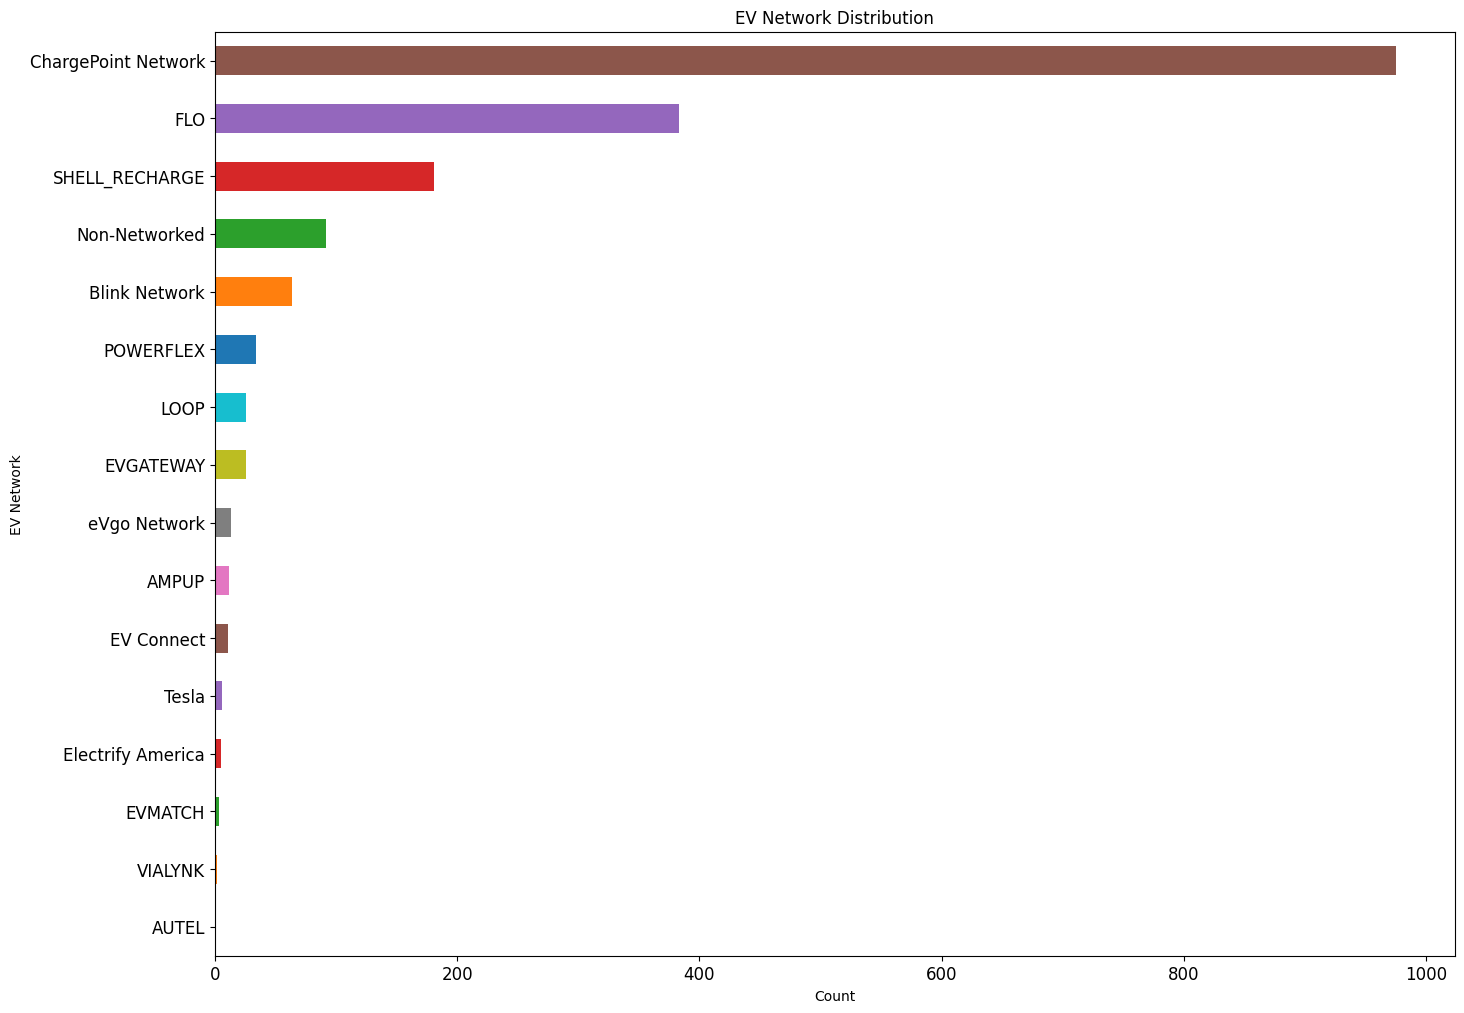

In [47]:
# which EV netwok is popular
# Get value counts and sort in descending order
data = Ev_df2['ev_network'].value_counts().sort_values(ascending=True)  # Ascending=True for correct horizontal order
colors = sns.color_palette("tab10", len(data))
plt.figure(figsize=(16, 12))  
data.plot(kind='barh', color=colors)  
plt.xlabel("Count")
plt.ylabel("EV Network")
plt.title("EV Network Distribution")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)  
plt.show()


* The ChargePoint network leads with almost 1000 EV charging stations, followed by FLO stations, Shell Recharge, Blink Network, and Non- Networked. Together, these providers dominate the public charging landscape, significantly influencing the accessibility of EV infrastructure. 
* On the other end of the spectrum, Tesla, EV Connect, AMPUP, Electrify America, EVMATCH, VIALYNK, and AUTEL have the fewest stations, with some networks operating as few as a single location.

#### 4.2 Bivariate Analysis

* In this section, we conduct a bivariate analysis to examine the relationship between two variables at a time. The aim is to understand how these variables interact and if there are any correlations or patterns worth noting. The focus is on identifying potential dependencies or associations between pairs of numerical and categorical features.

For numerical variables, we will assess:

Correlation and heatmaps to quantify the relationship between variables.
Scatter plots to visualize the strength and direction of the relationship.
Box plots to explore multiple variable relationships in a single view.

For categorical variables, we will analyze:

Contingency tables to examine the frequency distribution between categories.
Stacked bar charts to visualize how categories in one variable are distributed across another.
#####  The ev_workplace_charging' by 'ev_level2_evse_num'


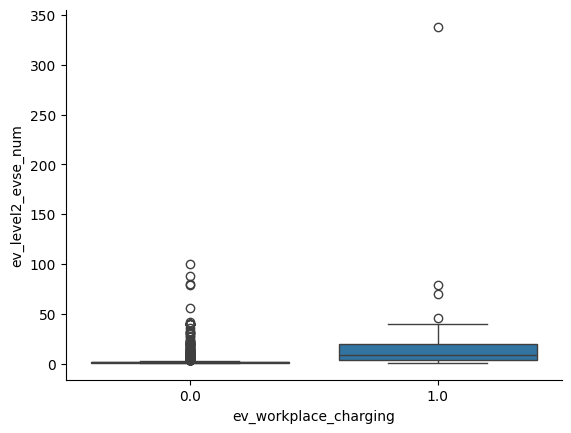

In [48]:

# Create box plot
sns.boxplot(data=Ev_df, x='ev_workplace_charging', y='ev_level2_evse_num')
plt.grid(False)  
sns.despine() 
plt.show()


The box plot visualization for the ev_workplace_charging column reveals the presence of an outlier. This suggests that there is an EV station with a significantly higher number of ev_level2_evse_num chargers compared to the rest, indicating an anomaly or an exceptional case within the dataset. This is special case that can alter the performance of the clustering model. Consider removing the outlier.
##### The latitude by Longitude

In [49]:
# Plot Charging Stations on a Map
m = folium.Map(location=[Ev_df2['latitude'].mean(), Ev_df2['longitude'].mean()], zoom_start=6)
HeatMap(Ev_df2[['latitude', 'longitude']].values).add_to(m)
m 

* The above folium map show the geographical distribution of Ev charging stations in Los Angeles

In [50]:
Ev_df2['access_code_cleaned'].value_counts()  # Check public vs. private stations
Ev_df2.groupby('station_region')['access_hours'].value_counts()[30:50] 

station_region                  access_hours
10654 Vinedale St               24.0            1
10715 Camerillo St              24.0            1
10719 S WESTERN AVE             24.0            1
10753 Woodbine St               24.0            1
10875 Pico Blvd                 24.0            1
10909 Hartsook St               24.0            1
10916 Huston St                 24.0            1
10919 S Figueroa St             24.0            1
10925 Blix St                   24.0            1
10949 Huston St                 24.0            1
10960 Wilshire Office Building  24.0            1
10984 Santa Monica Blvd         24.0            1
10UCP 9128                      24.0            1
10UCP BARHAM STAGES 1           24.0            1
10UCP BARHAM STAGES 2           24.0            1
10UCP PRKG LVL 5                24.0            5
110 E 110th St                  24.0            1
1101 W 28th St                  24.0            1
11048 Huston St                 24.0            1
1109 

##### Charging_ports by Number of Stations

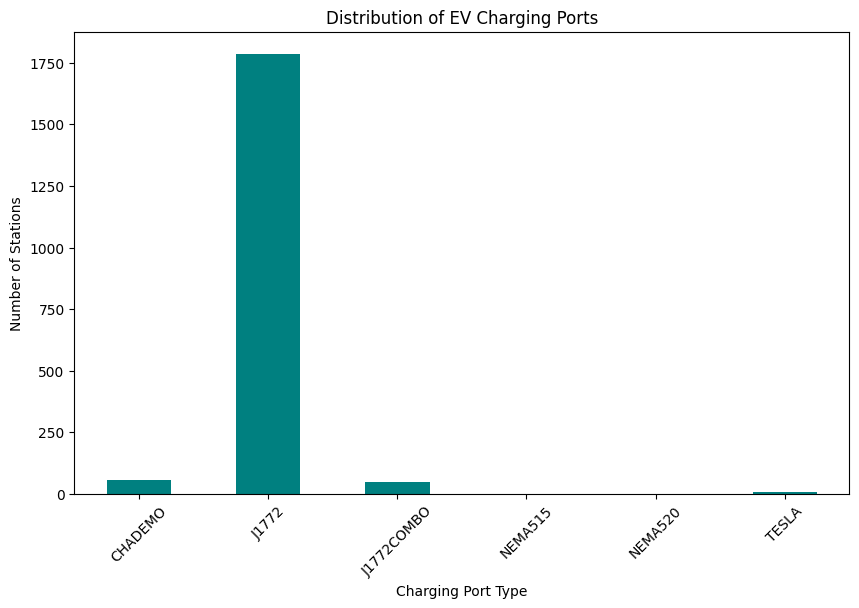

In [51]:
# Check the availability of different EV charging ports:
charging_ports = ['CHADEMO', 'J1772', 'J1772COMBO', 'NEMA515', 'NEMA520', 'TESLA']

plt.figure(figsize=(10, 6))
Ev_df2[charging_ports].sum().plot(kind='bar', color='teal')
plt.xlabel("Charging Port Type")
plt.ylabel("Number of Stations")
plt.title("Distribution of EV Charging Ports")
plt.xticks(rotation=45)
plt.show()

* The J1772 connector is the most widely used for Level 2 charging, available at over 1,750 stations. Following this, the J1772 Combo and CHAdeMO connectors are found at fewer than 50 stations, primarily supporting fast charging.

* In contrast, NEMA connectors (520 and 515) and Tesla chargers are less common in public charging networks. As electric vehicle adoption continues to grow, the J1772 connector remains the standard for Level 2 charging. NEMA and Tesla outlets are likely to serve as secondary options rather than mainstream solutions in the EV infrastructure landscape.


Influence clustering: including connector types as a feature might introduce a high degree of variability into the clustering process. Since J1772 connectors are the most common, the clustering model might over-represent stations with these connectors, leading to clusters that are biased toward this type. This could result in the clustering algorithm grouping stations primarily based on the type of connector, rather than other critical features like station accessibility, location, or the number of chargers.and the aspect of class imbalance

##### Number of Stations by Access hours

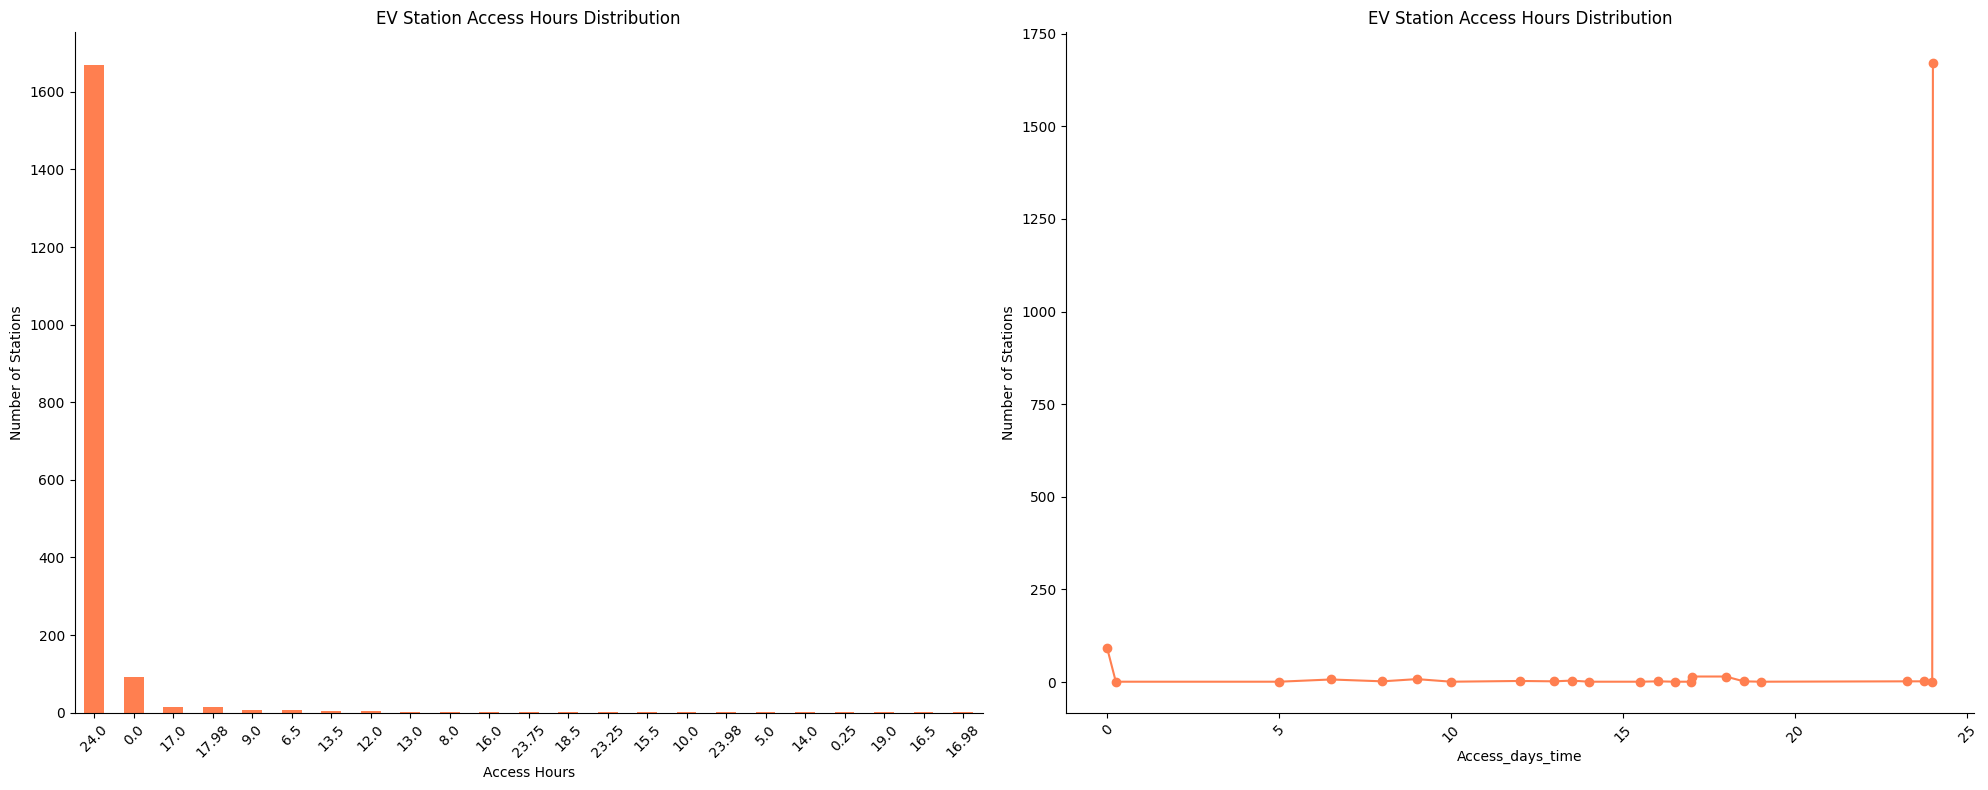

In [52]:
# Access hours and stations in LA
# Create a single figure with two axes
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 1. Bar plot
Ev_df2['access_hours'].value_counts().plot(kind='bar', color='coral', ax=axes[0])
axes[0].set_xlabel("Access Hours")
axes[0].set_ylabel("Number of Stations")
axes[0].set_title("EV Station Access Hours Distribution")
axes[0].tick_params(axis='x', rotation=45)

# 2. Line plot
Ev_df2['access_hours'].value_counts().sort_index().plot(
    marker='o', linestyle='-', color='coral', ax=axes[1]
)
axes[1].set_xlabel("Access_days_time")
axes[1].set_ylabel("Number of Stations")
axes[1].set_title("EV Station Access Hours Distribution")
axes[1].tick_params(axis='x', rotation=45)

for ax in axes:
    ax.grid(False)
    sns.despine(ax=ax) 
plt.tight_layout()
plt.show()


In Los Angeles, more than 1,600 EV charging stations are accessible 24 hours a day. However, only a small number of stations are available for shorter durations, such as 17 hours, 16 hours, or 13 hours per day.
Influence on the cluster model: The "access time" feature might not carry as much weight as other features like location, number of chargers. If the K-means algorithm uses access time as a significant feature, it could overemphasize its importance, especially when the majority of stations are available 24/7.

Before applying K-means, consider normalizing or standardizing the access time values, especially if there’s a wide range (e.g., from 24 hours to 13 hours). This will ensure that the feature is appropriately scaled and doesn’t disproportionately influence the clustering.


#### 4.3 Multivariate analysis
##### Charging Access by stations Across charger types

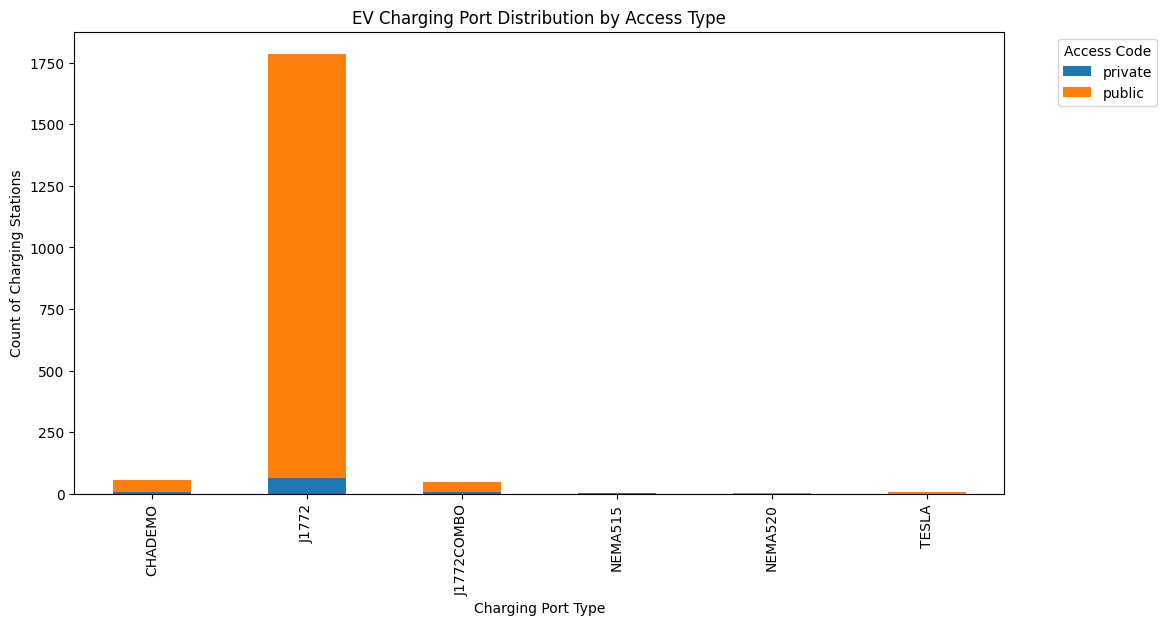

In [53]:
#  charging access (public vs. private) across charger types:
charging_ports = ['CHADEMO', 'J1772', 'J1772COMBO', 'NEMA515', 'NEMA520', 'TESLA']

Ev_df2_grouped = Ev_df2.groupby('access_code')[charging_ports].sum()

Ev_df2_grouped.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel("Charging Port Type")
plt.ylabel("Count of Charging Stations")
plt.title("EV Charging Port Distribution by Access Type")
plt.legend(title="Access Code", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From the plot, one thing stands out: J1772 dominates public charging, but it’s also present in private settings—just in smaller numbers.
While J1772 is used in both public and private charging, its dominance in public spaces is clear. Private charging, on the other hand, is more diverse—ranging from slow CHADEMO, J1772COMBO to NEMA outlets to other or fleet chargers. This diversity in private charging stations reflects the flexibility of EV owners to install a variety of chargers depending on their specific needs and vehicle requirements, whereas the public charging network tends to standardize around the J1772 connector to ensure broad compatibility and accessibility across a wide range of electric vehicles.

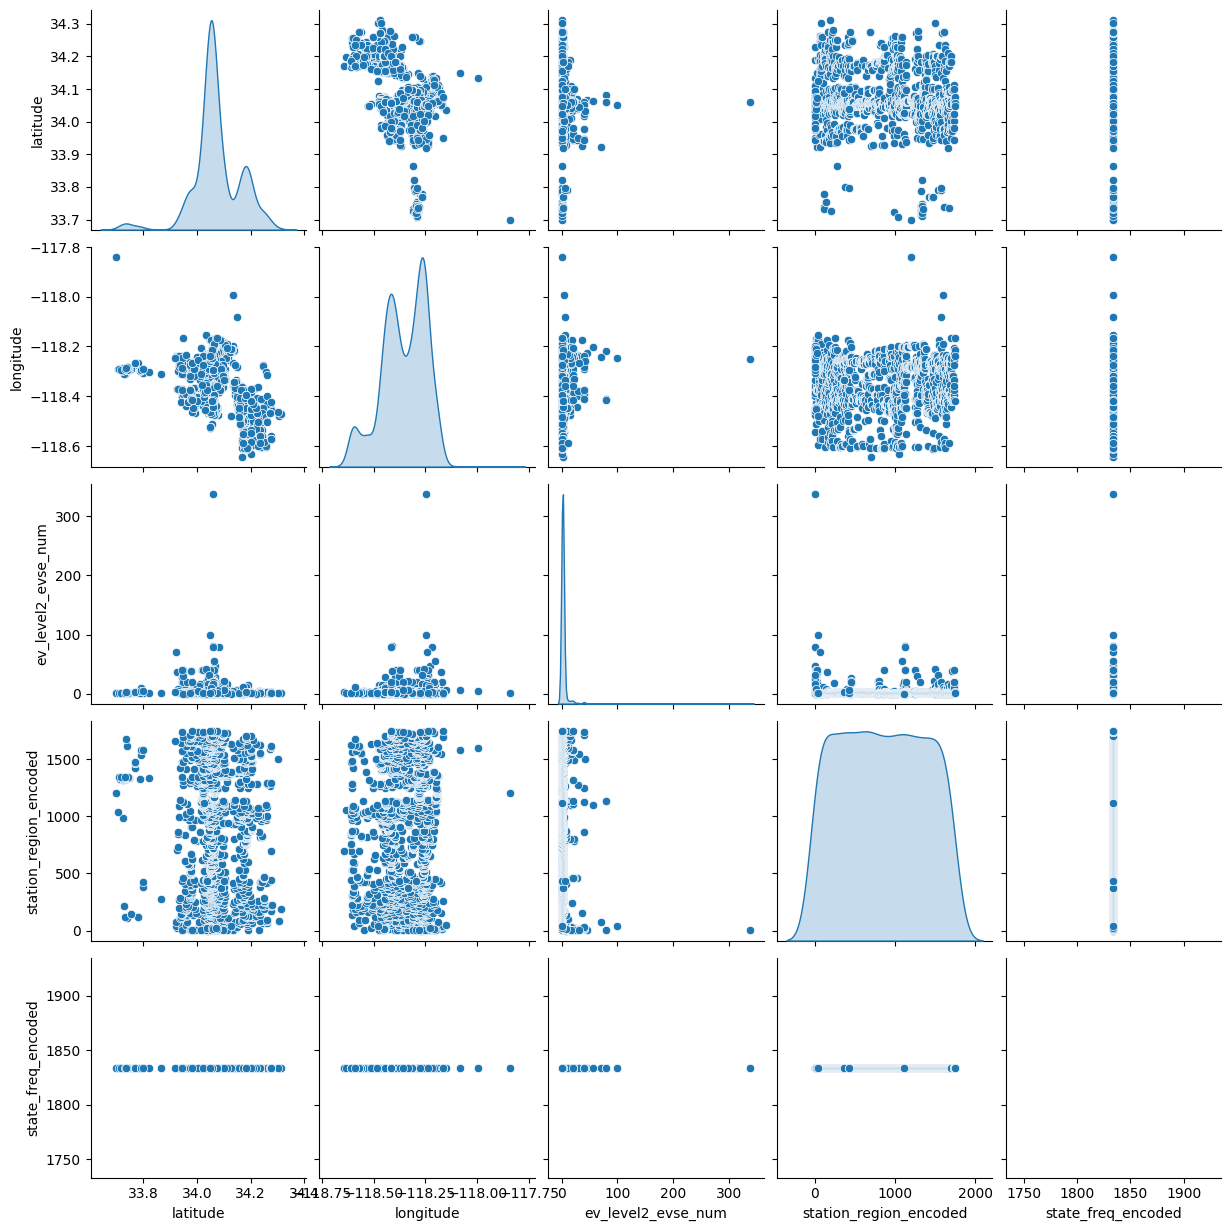

In [54]:
# Visualize interactions between numerical variables

sns.pairplot(Ev_df2[['latitude', 'longitude', 'ev_level2_evse_num', 
                      'station_region_encoded', 'state_freq_encoded']], diag_kind='kde')
plt.show()


This pair plot reveals key spatial and numerical patterns in EV charging station data. Latitude and longitude indicate stations are concentrated within specific geographic regions, suggesting coverage is not uniformly distributed. Most stations offer a limited number of Level 2 connectors, with only a few outliers having significantly higher capacity. Region and state encoding show distinct clusters, indicating clear geographic categorization. Notably, no strong linear correlations appear between location and connector availability, suggesting station capacity is influenced by factors beyond geography. Overall, the data highlights a need for strategic expansion to address regional disparities in EV infrastructure.

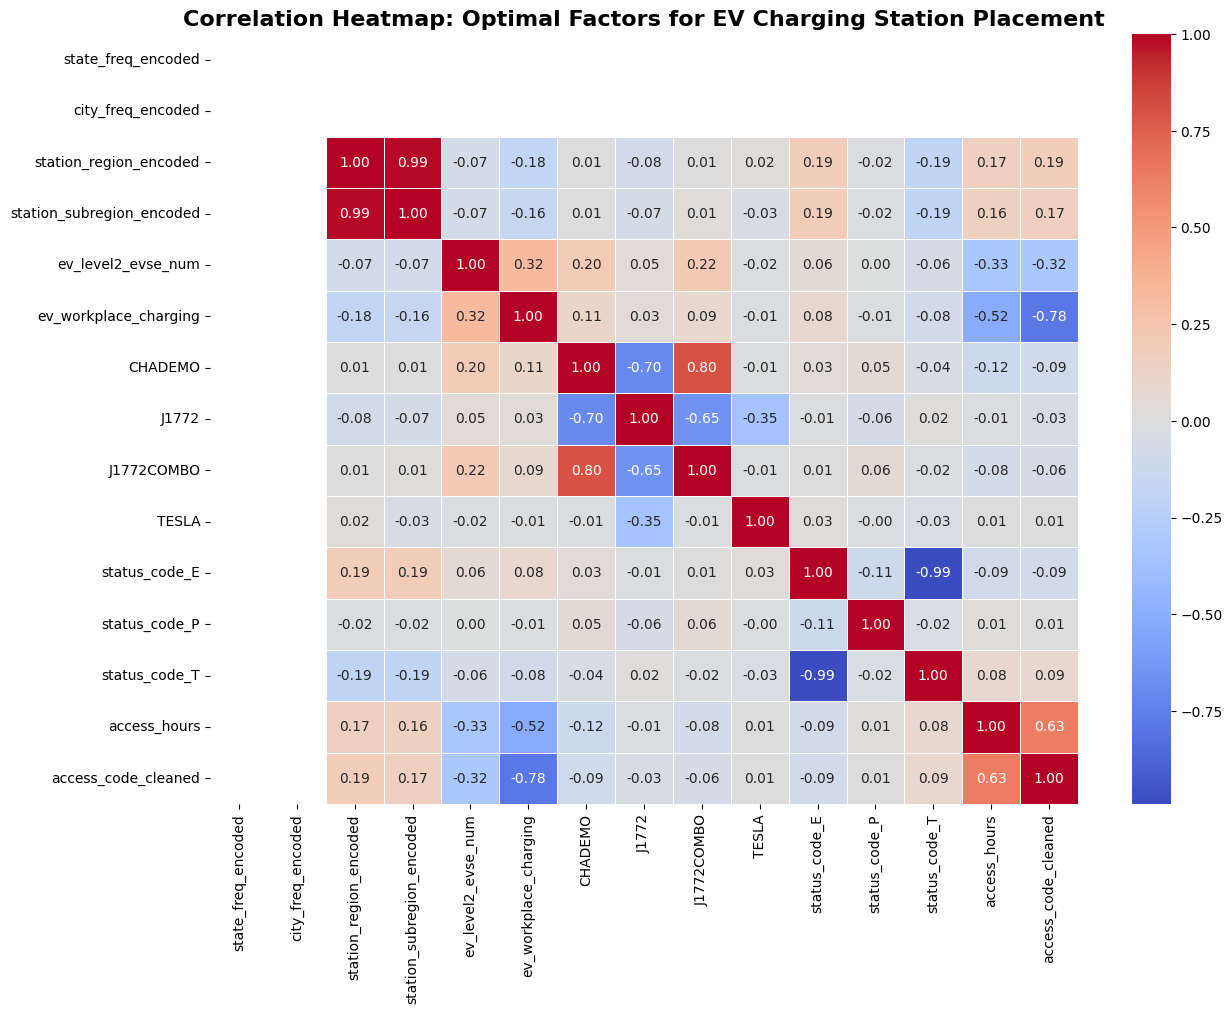

In [55]:
 #Select optimal columns
optimal_columns = [
    'state_freq_encoded', 'city_freq_encoded', 'station_region_encoded', 
    'station_subregion_encoded', 'ev_level2_evse_num', 'ev_workplace_charging', 
    'CHADEMO', 'J1772', 'J1772COMBO', 'TESLA', 'status_code_E', 
    'status_code_P', 'status_code_T', 'access_hours', 'access_code_cleaned'
]

# Filter dataset
df_corr = Ev_df2[optimal_columns]

# Compute correlation matrix
corr_matrix = df_corr.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Optimal Factors for EV Charging Station Placement', fontsize=16, fontweight='bold')
plt.show()


#### 5. Modelling

In [56]:
Ev_df3 = Ev_df3.drop(columns =['state_freq_encoded', 'city_freq_encoded', 'index'])
Ev_df3

,latitude,longitude,ev_workplace_charging,ev_level2_evse_num,station_region_encoded,station_subregion_encoded,access_hours,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T,ev_network_encoded,access_code_cleaned
0,34.040539,-118.271387,0.000000,7.000000,0,0,15.500000,0,1,0,0,0,0,True,False,False,92,1
1,34.059133,-118.248589,1.000000,338.000000,1,1,0.000000,1,1,1,0,0,0,True,False,False,92,0
2,34.066801,-118.227605,1.000000,46.000000,1,2,0.000000,1,1,0,0,0,0,True,False,False,92,0
3,34.036777,-118.368841,0.000000,13.000000,1,3,0.000000,0,1,0,0,0,0,True,False,False,92,0
4,34.039736,-118.236065,1.000000,27.000000,1,4,0.000000,0,1,0,0,0,0,True,False,False,92,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,34.053174,-118.225166,0.748384,6.238690,913,958,17.961224,0,1,0,0,0,0,True,False,False,48,0
3538,34.050239,-118.241959,1.000000,36.923752,865,909,2.050832,0,1,0,0,0,0,True,False,False,34,0
3539,34.028785,-118.445125,0.565979,11.961853,5,51,0.000000,0,1,0,0,0,0,True,False,False,92,0
3540,34.014263,-118.243435,0.258712,3.517423,1261,1309,0.000000,0,1,0,0,0,0,True,False,False,12,0


In [57]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
columns_to_scale = ['longitude', 'latitude', 'station_region_encoded', 'station_subregion_encoded', 'access_hours', 'ev_level2_evse_num']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the specified columns
Ev_df3[columns_to_scale] = scaler.fit_transform(Ev_df3[columns_to_scale])

# Columns that were not scaled (you can adjust this list as necessary)
columns_not_to_scale = [col for col in Ev_df3.columns if col not in columns_to_scale]

# Concatenate the scaled columns with the non-scaled columns
Ev_df2_scaled = Ev_df3[columns_not_to_scale + columns_to_scale]

# Display the updated DataFrame
Ev_df2_scaled


,ev_workplace_charging,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T,ev_network_encoded,access_code_cleaned,longitude,latitude,station_region_encoded,station_subregion_encoded,access_hours,ev_level2_evse_num
0,0.000000,0,1,0,0,0,0,True,False,False,92,1,0.462683,0.557075,0.000000,0.000000,0.645833,0.020710
1,1.000000,1,1,1,0,0,0,True,False,False,92,0,0.491072,0.587457,0.000572,0.000556,0.000000,1.000000
2,1.000000,1,1,0,0,0,0,True,False,False,92,0,0.517203,0.599986,0.000572,0.001112,0.000000,0.136095
3,0.000000,0,1,0,0,0,0,True,False,False,92,0,0.341327,0.550929,0.000572,0.001668,0.000000,0.038462
4,1.000000,0,1,0,0,0,0,True,False,False,92,0,0.506668,0.555763,0.000572,0.002223,0.000000,0.079882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,0.748384,0,1,0,0,0,0,True,False,False,48,0,0.520240,0.577720,0.522311,0.532518,0.748384,0.018458
3538,1.000000,0,1,0,0,0,0,True,False,False,34,0,0.499328,0.572924,0.494851,0.505281,0.085451,0.109242
3539,0.565979,0,1,0,0,0,0,True,False,False,92,0,0.246333,0.537870,0.002860,0.028349,0.000000,0.035390
3540,0.258712,0,1,0,0,0,0,True,False,False,12,0,0.497490,0.514143,0.721396,0.727626,0.000000,0.010407


#### The Cluster Model
1. Kmeans Model

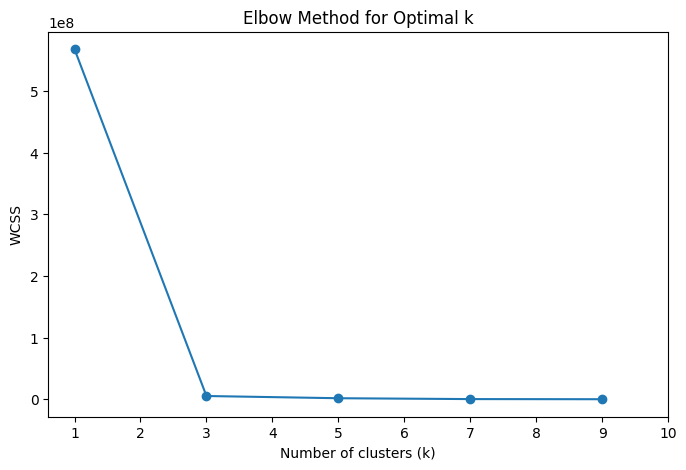

In [58]:
# Elbow Method to determine optimal k
wcss = []
for i in range(1, 11, 2):  # Check all values from k=1 to k=10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(Ev_df2_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11, 2), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))  # Ensure all k values are labeled
plt.show()


In [59]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):  # Silhouette score is only meaningful for k >= 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(Ev_df2_scaled)
    silhouette = silhouette_score(Ev_df2_scaled, labels)
    print(f"Silhouette Score for k={k}: {silhouette:.3f}")


Silhouette Score for k=2: 0.882
Silhouette Score for k=3: 0.898
Silhouette Score for k=4: 0.782
Silhouette Score for k=5: 0.864
Silhouette Score for k=6: 0.870
Silhouette Score for k=7: 0.873
Silhouette Score for k=8: 0.872
Silhouette Score for k=9: 0.870
Silhouette Score for k=10: 0.869


* A Silhouette Score is a measure of how well each point in a cluster is matched to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to +1:

1. +1 indicates that the points are well clustered and far away from other clusters.
2. 0 means the points are on or very close to the boundary between clusters.
3. -1 indicates that the points are likely in the wrong cluster.

* Scores between 0.5 and 0.7: These indicate decent clustering. While it’s not perfect, it suggests that the clusters are reasonably well-formed with some separation.

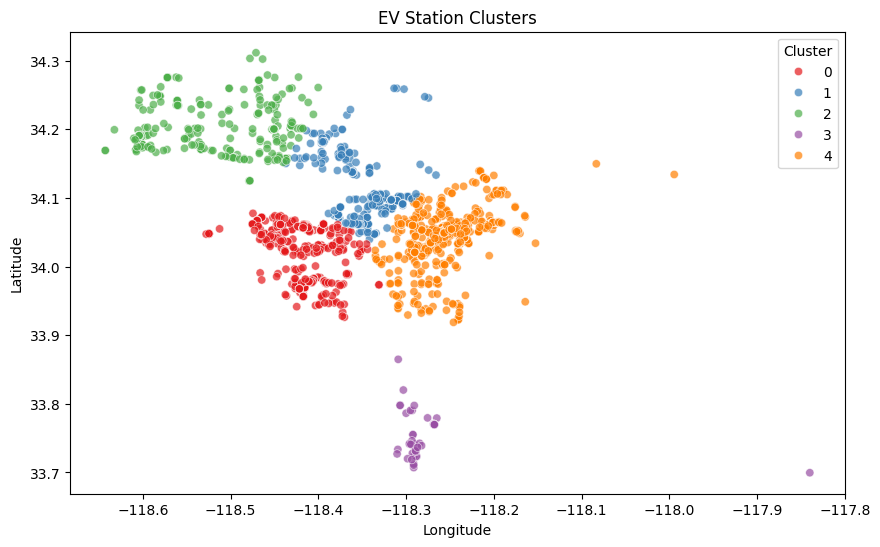

In [60]:
# Subset only latitude & longitude
X = Ev_df2[['latitude', 'longitude']].copy()  # Keep original DataFrame structure
kmeans = KMeans(n_clusters=5, random_state=42)
Ev_df2['cluster'] = kmeans.fit_predict(X)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Ev_df2['longitude'], y=Ev_df2['latitude'], hue=Ev_df2['cluster'], palette="Set1", alpha=0.7)
plt.title("EV Station Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()

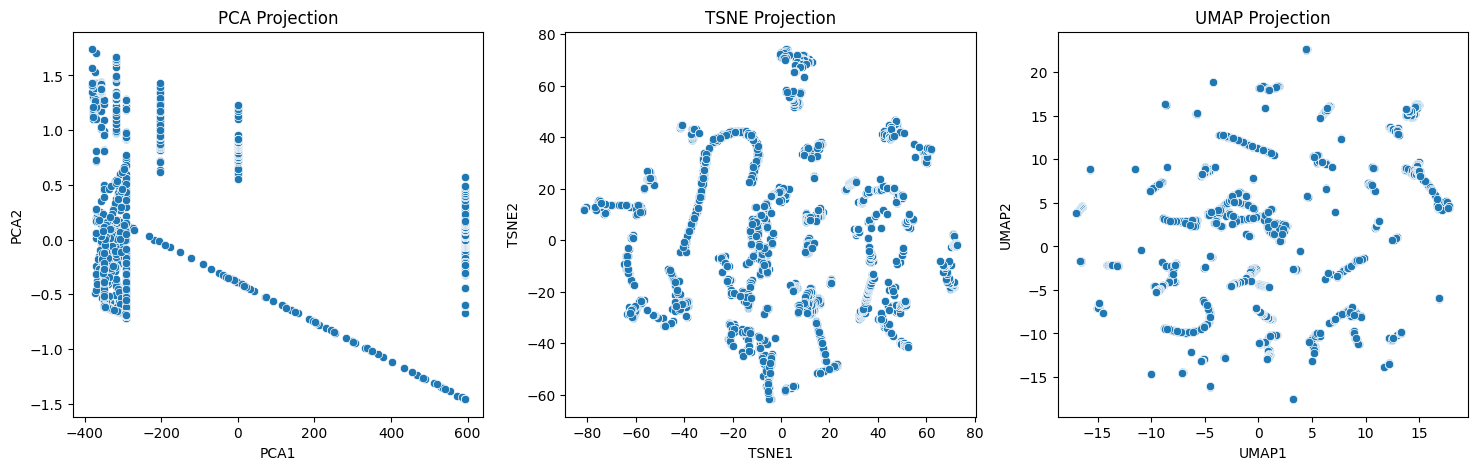

,PCA1,PCA2,TSNE1,TSNE2,UMAP1,UMAP2
0,-290.998495,0.726968,-0.299096,18.209463,-14.924666,-6.810480
1,-291.000428,-0.672570,4.232811,-57.183868,16.836966,-5.959473
2,-291.000368,-0.670985,1.891819,-57.345676,-16.555628,-1.744962
3,-290.999684,-0.170841,-10.515335,7.852224,2.577304,2.348839
4,-291.000333,-0.692889,-4.078444,-47.552464,-6.406771,2.490124


In [61]:
# Apply dimensionality reduction techniques
methods = {
   'PCA': PCA(n_components=2),
   'TSNE': TSNE(n_components=2, random_state=42, perplexity=30),
   'UMAP': umap.UMAP(n_components=2, random_state=42)
}

# Create result columns
results = {}
for name, model in methods.items():
   result = model.fit_transform(Ev_df2_scaled)
   results[f'{name}1'] = result[:, 0]
   results[f'{name}2'] = result[:, 1]

# Combine results in DataFrame
Ev_df2_reduced = pd.DataFrame(results)

# Plot all projections
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i, method in enumerate(['PCA', 'TSNE', 'UMAP']):
   sns.scatterplot(x=f'{method}1', y=f'{method}2', data=Ev_df2_reduced, ax=ax[i])
   ax[i].set_title(f'{method} Projection')

plt.show()
Ev_df2_reduced.head()

In [62]:
# K-Means clustering with optimal K selection
inertia = []
sil_scores = []
pca_cols = ['PCA1', 'PCA2']
umap_cols = ['UMAP1', 'UMAP2']

# Find optimal K
for k in range(1, 10,2):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(Ev_df2_reduced[pca_cols])
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(Ev_df2_reduced[pca_cols], labels))

# Use elbow method for optimal K
optimal_k = range(1, 10,2)np.argmin(np.diff(inertia))]

# Apply K-Means and DBSCAN
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
dbscan = DBSCAN(eps=0.5, min_samples=5)

Ev_df2_reduced['KMeans_Cluster'] = kmeans.fit_predict(Ev_df2_reduced[pca_cols])
Ev_df2_reduced['DBSCAN_Cluster'] = dbscan.fit_predict(Ev_df2_reduced[umap_cols])

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=Ev_df2_reduced, palette='viridis', ax=ax[0])
sns.scatterplot(x='UMAP1', y='UMAP2', hue='DBSCAN_Cluster', data=Ev_df2_reduced, palette='tab10', ax=ax[1])

ax[0].set_title(f'K-Means (k={optimal_k})')
ax[1].set_title('DBSCAN')
plt.show()

# Preview results
Ev_df2_reduced.head()

SyntaxError: unmatched ']' (2432477049.py, line 15)

In [ ]:
# Print optimal K and its silhouette score
print(f"Optimal number of clusters: {optimal_k}")
print(f"Silhouette score for optimal K: {sil_scores[optimal_k-2]}")

# Examine cluster distribution
print(Ev_df2_reduced['KMeans_Cluster'].value_counts())

# Optional: Analyze cluster characteristics
cluster_means = Ev_df2_reduced.groupby('KMeans_Cluster').mean()
print(cluster_means)

Preprocessing pipeline

In [ ]:
# Creating a pipeline
transformer = ColumnTransformer([
    ("cat",Pipeline([
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ohe",OneHotEncoder())
        ]),categoricals),
    ("num",Pipeline([
        ("imputer",SimpleImputer(strategy='constant', fill_value = 0)),
        ("scaler",StandardScaler())
        ]),numericals)
])

In [ ]:
pipe = Pipeline([
    ("pre_pro",transformer),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

In [ ]:
# Train the model on the data set
pipe.fit(df_1)


In [ ]:
# Get the cluster labels for each data point
df_1['cluster'] = pipe.predict(df_1)

# Display the first few rows of the DataFrame with cluster labels
print(df_1.head(20))

In [ ]:
# Plot the clusters (latitude vs. longitude)
plt.scatter(df_1['latitude'], df_1['longitude'], c=df_1['cluster'], cmap='viridis')
plt.title("KMeans Clustering of EV Stations")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.colorbar(label="Cluster Label")
plt.show()


In [ ]:
def clean_and_split_station_name(station_name):
    """
    Cleans the station name by stripping extra spaces and splitting it into two columns:
    - `station_region`: The part before the hyphen
    - `station_subregion`: The part after the hyphen

    Args:
        station_name (str): The station name.

    Returns:
        tuple: (station_region, station_subregion)
    """
    if not isinstance(station_name, str):  # Handle NaN or non-string values
        return None, None

    station_name = station_name.strip()

    # Check if the station name contains a hyphen
    if ' - ' in station_name:
        return tuple(station_name.split(' - ', 1))  # Split at the first hyphen
    else:
        return station_name, station_name  # If no hyphen, return the name in both columns

# Apply the function to the 'station_name' column and create two new columns
Ev_df2[['station_region', 'station_subregion']] = Ev_df2['station_name'].apply(lambda x: pd.Series(clean_and_split_station_name(x)))

# Show the cleaned and split DataFrame
Ev_df2[['station_name', 'station_region', 'station_subregion']]
    


In [ ]:
 Drop missing values
Ev_df2 = Ev_df2.dropna(subset=["city"])

# Clean the city names
Ev_df2["city"] = Ev_df2["city"].str.lower().str.strip()

# Standardize common city variations
city_corrections = {
    "nyc": "new york",
    "sf": "san francisco",
    "san fran": "san francisco",
    "la": "los angeles",
}
Ev_df2["city"] = Ev_df2["city"].replace(city_corrections)

# Apply frequency encoding
city_counts = Ev_df2["city"].value_counts()
Ev_df2["city_freq_encoded"] = Ev_df2["city"].map(city_counts)

Ev_df2.head()


In [ ]:
# Handle missing values

# Drop rows with missing latitude or longitude as they are essential for spatial analysis
ev_cleaned = ev_filtered.dropna(subset=['latitude', 'longitude'])

# Fill missing network values with 'Unknown'
ev_cleaned['ev_network'].fillna('Unknown', inplace=True)

# Fill missing connector types with 'Unknown'
ev_cleaned['ev_connector_types'].fillna('Unknown', inplace=True)

# Fill missing charger counts with 0 (indicating no chargers of that type)
ev_cleaned['ev_dc_fast_num'].fillna(0, inplace=True)
ev_cleaned['ev_level1_evse_num'].fillna(0, inplace=True)
ev_cleaned['ev_level2_evse_num'].fillna(0, inplace=True)

# Fill missing pricing information with 'Not Available'
ev_cleaned['ev_pricing'].fillna('Not Available', inplace=True)

# Verify missing values have been handled
cleaned_missing = ev_cleaned.isnull().sum()

# Display cleaned dataset
import ace_tools as tools; tools.display_dataframe_to_user(name="Cleaned EV Charging Stations Dataset", dataframe=ev_cleaned)

cleaned_missing


### More EDA and visualization focusing on L.A. 

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the EV dataset
ev_stations = pd.read_csv('Alternative_Fueling_Stations.csv')

# Filter the dataset to focus on EV-related stations
ev_only = ev_stations[ev_stations['fuel_type_code'] == 'ELEC']

# Select relevant columns
ev_filtered = ev_only[['OBJECTID', 'access_code', 'access_days_time', 'date_last_confirmed', 'fuel_type_code',
                       'groups_with_access_code', 'id', 'open_date', 'status_code', 'station_name',
                       'updated_at', 'geocode_status', 'latitude', 'longitude', 'city', 'country', 'state',
                       'street_address', 'zip', 'ev_connector_types', 'ev_level2_evse_num', 'ev_network',
                       'ev_workplace_charging', 'x', 'y']]

# Check for percentage of missing values
missing_percentage = (ev_filtered.isnull().sum() / len(ev_filtered)) * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

# Handle missing values with a more refined approach
# Drop rows with missing essential location data
ev_cleaned = ev_filtered.dropna(subset=['latitude', 'longitude', 'city', 'state'])

# Fill missing categorical values with 'Unknown'
categorical_cols = ev_cleaned.select_dtypes(include=['object']).columns
ev_cleaned[categorical_cols] = ev_cleaned[categorical_cols].fillna('Unknown')

# Fill missing numerical values with 0
ev_cleaned.fillna(0, inplace=True)

# Verify missing values have been handled
print("Missing values after handling:")
print(ev_cleaned.isnull().sum())

# Save cleaned dataset
ev_cleaned.to_csv('refined_cleaned_ev_stations.csv', index=False)

print("Refined cleaned dataset saved as 'refined_cleaned_ev_stations.csv'")


In [ ]:
ev_cleaned.shape

### EDA

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Load the cleaned EV dataset
ev_cleaned = pd.read_csv('refined_cleaned_ev_stations.csv')

# Filter the dataset for Los Angeles
ev_la = ev_cleaned[(ev_cleaned['city'].str.contains('Los Angeles', case=False, na=False)) & (ev_cleaned['state'] == 'CA')]

# Display basic statistics
print(ev_la.describe())
print(ev_la.info())

# Plot distribution of EV networks in Los Angeles
plt.figure(figsize=(10, 6))
ev_la['ev_network'].value_counts().plot(kind='bar')
plt.title('Distribution of EV Networks in Los Angeles')
plt.xlabel('EV Network')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of EV connector types in Los Angeles
plt.figure(figsize=(10, 6))
ev_la['ev_connector_types'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of EV Connector Types in Los Angeles')
plt.xlabel('Connector Type')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.show()

# Geospatial visualization for Los Angeles with Marker Clusters
la_map = folium.Map(location=[ev_la['latitude'].mean(), ev_la['longitude'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(la_map)

for idx, row in ev_la.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  popup=f"{row['station_name']} - {row['ev_network']}", 
                  icon=folium.Icon(color='blue', icon='bolt', prefix='fa')).add_to(marker_cluster)

# Display map directly in notebook
display(la_map)

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Load the cleaned EV dataset
ev_cleaned = pd.read_csv('refined_cleaned_ev_stations.csv')

# Filter the dataset for Los Angeles
ev_la = ev_cleaned[(ev_cleaned['city'].str.contains('Los Angeles', case=False, na=False)) & (ev_cleaned['state'] == 'CA')]

# Display basic statistics
print(ev_la.describe())
print(ev_la.info())

# Plot distribution of EV networks in Los Angeles
plt.figure(figsize=(10, 6))
ev_la['ev_network'].value_counts().plot(kind='bar')
plt.title('Distribution of EV Networks in Los Angeles')
plt.xlabel('EV Network')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.show()

# Generate a heatmap of EV charging station density in Los Angeles
la_map = folium.Map(location=[ev_la['latitude'].mean(), ev_la['longitude'].mean()], zoom_start=10)

# Prepare data for heatmap
heat_data = [[row['latitude'], row['longitude']] for index, row in ev_la.iterrows()]
HeatMap(heat_data).add_to(la_map)

# Display map directly in notebook
display(la_map)


Show Underserved Areas

Code to:

* Perform spatial density analysis using DBSCAN to identify underserved areas.
* Generate a heatmap of existing EV station coverage.
* Highlight underserved areas with markers on an interactive map displayed directly in your notebook.

In [ ]:
# Import necessary libraries
import pandas as pd
import folium
from folium.plugins import HeatMap
from sklearn.cluster import DBSCAN
import networkx as nx
from IPython.display import display

# Load the cleaned EV dataset
ev_cleaned = pd.read_csv('refined_cleaned_ev_stations.csv')

# Filter the dataset for Los Angeles
ev_la = ev_cleaned[(ev_cleaned['city'].str.contains('Los Angeles', case=False, na=False)) & (ev_cleaned['state'] == 'CA')]

# Perform spatial density analysis using DBSCAN to identify underserved areas
coords = ev_la[['latitude', 'longitude']].to_numpy()
clustering = DBSCAN(eps=0.01, min_samples=5).fit(coords)
ev_la['cluster'] = clustering.labels_
underserved = ev_la[ev_la['cluster'] == -1]

# Heatmap for station density
heat_map = folium.Map(location=[ev_la['latitude'].mean(), ev_la['longitude'].mean()], zoom_start=10)
heat_data = [[row['latitude'], row['longitude']] for index, row in ev_la.iterrows()]
HeatMap(heat_data).add_to(heat_map)
display(heat_map)

# Map for underserved areas
underserved_map = folium.Map(location=[ev_la['latitude'].mean(), ev_la['longitude'].mean()], zoom_start=10)
for idx, row in underserved.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=f"Underserved Area: {row['station_name']}", icon=folium.Icon(color='red')).add_to(underserved_map)
display(underserved_map)

# Network analysis map
G = nx.Graph()
for idx, row in ev_la.iterrows():
    G.add_node(idx, pos=(row['longitude'], row['latitude']))
for i, coord1 in enumerate(coords):
    for j, coord2 in enumerate(coords):
        if i != j:
            dist = ((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)**0.5
            if dist < 0.02:
                G.add_edge(i, j, weight=dist)
network_map = folium.Map(location=[ev_la['latitude'].mean(), ev_la['longitude'].mean()], zoom_start=10)
for edge in G.edges:
    point1 = ev_la.iloc[edge[0]][['latitude', 'longitude']]
    point2 = ev_la.iloc[edge[1]][['latitude', 'longitude']]
    folium.PolyLine([(point1.latitude, point1.longitude), (point2.latitude, point2.longitude)], color='blue', weight=1).add_to(network_map)
for idx, row in ev_la.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=3, color='green', fill=True).add_to(network_map)
display(network_map)

# Display number of underserved areas
print(f"Number of underserved areas identified: {len(underserved)}")


In [ ]:
from sklearn.cluster import KMeans

# Defining the number of clusters
n_clusters = 2 

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# Training the model
y_kmeans = kmeans.fit_predict(X_tfidf)

## Print the cluster assignments for each document
print(f"Cluster Assignments: {y_kmeans}")

In [ ]:
# Step 3: Predict the cluster assignments for each document
predictions = kmeans.predict(X_tfidf)

# Print the predictions
print(f"Predicted Cluster Assignments: {predictions}")

### Nairobi OpenStreet Road Netowrk Data

In [ ]:
# Import OpenStreet Map
import osmnx as ox
# Import Geopandas for geospatial Information
import geopandas as gpd

# Define the target location
city = "Nairobi, Kenya"

# Fetch road network
G = ox.graph_from_place(city, network_type="drive")

# Convert to DataFrame
nodes, edges = ox.graph_to_gdfs(G)
#edges.to_csv("nairobi_roads.csv")
print("Nairobi road data saved")


In [ ]:
### Loading OpenStreet Nairobi Data

data = pd.read_csv('nairobi_roads.csv')

data.head()

This dataset describes Nairobi's road network, with relevant features such as:

* osmid (OpenStreetMap ID)
* highway (road type classification)
* length (road segment length)
* geometry (road segment coordinates)
* lanes (number of lanes)
* junction (whether it's a roundabout or intersection)
* maxspeed (speed limits)

### Tailoring U.S.A data for Kenya

Since the dataset originates from the US, we need to extract only relevant data that can be adapted to the Kenyan context.

1. Filter only EV-related data: Remove non-EV stations (e.g., CNG, LPG) and retain stations where fuel_type_code = EV.
2. Extract relevant columns: Focus on features that can be applied in Kenya, such as:
    * access_code (public/private)
    * ev_pricing_fr (if pricing models are useful)
    * x, y (longitude and latitude)
    * ev_network_ids_posts (charging infrastructure details)
3. Find similar land-use patterns in Kenya (e.g., CBD, highways, malls).
4. Use Nairobi road network data to determine high-traffic areas.
5. Compare US charging station clustering patterns to predict optimal locations in Nairobi.

### Feature Engineering

Feature engineering by integrating the Nairobi road network dataset with the insights from Los Angeles.

Execution plan:

Load and preprocess the Nairobi road network dataset.
Create features such as:
Proximity to main roads,
Traffic flow estimates based on road types and lengths,
Accessibility and connectivity measures.
Match these features with potential EV charging station points to help determine optimal placement.

#### Cleaning the Street Address
We standardize the street address column to make the entries more comparable for clustering purposes. The process include
1. Converting the case to lower.
2. Normalizing the direction indicators such as n to north, s to south, w to west and e to east.
3. Standardizing the street abbreviations such as the st to street, blvd to boulevard and dr to drive and av to avenue. This is important for transformation of this column to numericals for clustering purposes.
4. Removal of special characters and the presence of white spaces. 
##### Dealing with street numbers.
Drop the street numbers.Clustering by street type/name will yield more meaningful clusters than using street numbers. Different addresses can have different street numbers that are unrelated to each other. These street numbers could only introduce noise. They are arbitrary,i.e do not indicate meaningful patterns.
To encode the cleaned street addresses, use the common frequency or the label encoding.

In [ ]:
import pandas as pd
import re

def clean_street_addresses(df, column_name):
    """
    Clean and standardize street addresses, keeping only the street name
    and converting abbreviations to full words.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing the address column
    column_name (str): Name of the column containing street addresses
    
    Returns:
    pandas.DataFrame: DataFrame with cleaned street names
    """
    # Create a copy to avoid modifying the original
    df = df.copy()
    
    # Create a new column for cleaned addresses
    df['cleaned_address'] = df[column_name].astype(str)
    
    # Convert to lowercase
    df['cleaned_address'] = df['cleaned_address'].str.lower()
    
    # Remove street number at the beginning
    df['cleaned_address'] = df['cleaned_address'].str.replace(r'^\d+\s+', '')
    
    # Standardize directional indicators with more flexible matching
    direction_mapping = {
        'n': 'north',
        's': 'south',
        'e': 'east',
        'w': 'west'
    }
    
    for abbr, full in direction_mapping.items():
        # Allow direction to be at the start, end, or between words
        df['cleaned_address'] = df['cleaned_address'].str.replace(rf'(^|\s){abbr}(\s|$)', rf'\1{full}\2')
    
    # Standardize street type abbreviations
    street_type_mapping = {
        'st': 'street',
        'ave': 'avenue',
        'blvd': 'boulevard',
        'dr': 'drive',
        'rd': 'road',
        'ln': 'lane',
        'way': 'way',
        'pl': 'place',
        'plz': 'plaza',
        'cir': 'circle',
        'ct': 'court',
        'ter': 'terrace',
        'pier': 'pier'
    }
    
    for abbr, full in street_type_mapping.items():
        df['cleaned_address'] = df['cleaned_address'].str.replace(f' {abbr}\\b', f' {full}')
    
    # Remove any special characters and extra whitespace
    df['cleaned_address'] = df['cleaned_address'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    df['cleaned_address'] = df['cleaned_address'].str.strip()
    
    # Remove multiple spaces
    df['cleaned_address'] = df['cleaned_address'].str.replace(r'\s+', ' ')
    
    return df

# Example usage:
Ev_df2 = clean_street_addresses(Ev_df2, 'street_address')
Ev_df2.head()


In [ ]:
# Count the frequency of each unique address
frequency_encoding = Ev_df2['cleaned_address'].value_counts()

# Map tahe frequencies back to the 'cleaned_address' column
Ev_df2['encoded_address'] = Ev_df2['cleaned_address'].map(frequency_encoding)

# Drop the 'encoded_address' column after encoding
Ev_df2.drop(columns=['cleaned_address'], inplace=True)

# Display the resulting DataFrame
Ev_df2.head()